# 预处理降雨数据

In [17]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("data\data_preprocessxlsx.xlsx", engine="openpyxl")

# Display the first few rows
print(df.head())

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\AORUS\AppData\Local\Temp\ipykernel_16336\3781301094.py:4: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_excel("data\data_preprocessxlsx.xlsx", engine="openpyxl")


    患者ID 是否复诊 是否住院 患者性别  患者年龄 患者职业 现在住址地市       发病日期 是否采集生物样本      食品分类  \
0      1    否    否    女  27.0   工人    嘉兴市 2022-05-17        是  水产动物及其制品   
1      1    否    否    女  27.0   工人    嘉兴市 2022-05-17        是  水产动物及其制品   
2      1    否    否    女  27.0   工人    嘉兴市 2022-05-17        是  水产动物及其制品   
3      2    否    否    男  63.0   农民    金华市 2023-10-17        否     肉与肉制品   
4      3    否    否    女  22.0   不详    温州市 2021-06-10        否     肉与肉制品   

  加工及包装方式 进食场所类型       进食日期 其他人是否发病 鉴定结果大类 鉴定结论  
0   餐饮服务业     其他 2022-05-17       否    NaN  NaN  
1   餐饮服务业     其他 2022-05-17       否    NaN  NaN  
2   餐饮服务业     其他 2022-05-17       否    NaN  NaN  
3    家庭自制     家庭 2023-10-17       否    NaN  NaN  
4   餐饮服务业     其他 2021-06-09       是    NaN  NaN  


In [18]:
city_list = df["现在住址地市"].unique()
city_list

array(['嘉兴市', '金华市', '温州市', '台州市', '丽水市', '杭州市', '衢州市', '绍兴市', '宁波市',
       '湖州市', '舟山市'], dtype=object)

In [19]:
df.keys()

Index([' 患者ID', '是否复诊', '是否住院', '患者性别', '患者年龄', '患者职业', '现在住址地市', '发病日期',
       '是否采集生物样本', '食品分类', '加工及包装方式', '进食场所类型', '进食日期', '其他人是否发病', '鉴定结果大类',
       '鉴定结论'],
      dtype='object')

### rename all filename

In [14]:
import os
import re

directory = r"data\降雨byday"

# Iterate through files in the directory
for filename in os.listdir(directory):
    match = re.match(r"(\d{4})\w*\.xlsm", filename)  # Match <year>xxxxx.xlsm
    if match:
        new_name = f"{match.group(1)}.xlsm"  # Keep only <year>.xlsm
        old_path = os.path.join(directory, filename)
        new_path = os.path.join(directory, new_name)

        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} -> {new_name}")

print("Renaming completed!")

Renamed: 1980年各城市降水量数据.xlsm -> 1980.xlsm
Renamed: 1981年各城市降水量数据.xlsm -> 1981.xlsm
Renamed: 1982年各城市降水量数据.xlsm -> 1982.xlsm
Renamed: 1983年各城市降水量数据.xlsm -> 1983.xlsm
Renamed: 1984年各城市降水量数据.xlsm -> 1984.xlsm
Renamed: 1985年各城市降水量数据.xlsm -> 1985.xlsm
Renamed: 1986年各城市降水量数据.xlsm -> 1986.xlsm
Renamed: 1987年各城市降水量数据.xlsm -> 1987.xlsm
Renamed: 1988年各城市降水量数据.xlsm -> 1988.xlsm
Renamed: 1989年各城市降水量数据.xlsm -> 1989.xlsm
Renamed: 1990年各城市降水量数据.xlsm -> 1990.xlsm
Renamed: 1991年各城市降水量数据.xlsm -> 1991.xlsm
Renamed: 1992年各城市降水量数据.xlsm -> 1992.xlsm
Renamed: 1993年各城市降水量数据.xlsm -> 1993.xlsm
Renamed: 1994年各城市降水量数据.xlsm -> 1994.xlsm
Renamed: 1995年各城市降水量数据.xlsm -> 1995.xlsm
Renamed: 1996年各城市降水量数据.xlsm -> 1996.xlsm
Renamed: 1997年各城市降水量数据.xlsm -> 1997.xlsm
Renamed: 1998年各城市降水量数据.xlsm -> 1998.xlsm
Renamed: 1999年各城市降水量数据.xlsm -> 1999.xlsm
Renamed: 2000年各城市降水量数据.xlsm -> 2000.xlsm
Renamed: 2001年各城市降水量数据.xlsm -> 2001.xlsm
Renamed: 2002年各城市降水量数据.xlsm -> 2002.xlsm
Renamed: 2003年各城市降水量数据.xlsm -> 2003.xlsm
Renamed: 2004年各城

### get weather hash
市降雨量 = $\sum_{i=1}^{区数量}区降雨量$

In [1]:
import pandas as pd
from src.utils.get_rain import get_province,  get_hash_by_date

weather_hash = {}
for year in range(2013, 2024):
    df_water = pd.read_excel(rf"data\降雨byday\{year}.xlsm", engine="openpyxl")
    df_water = get_province(df_water, "浙江省")  # Filter for province
    temp = get_hash_by_date(df_water)  # Get year-wise precipitation data
    
    for date, city_data in temp.items():
        if date not in weather_hash:
            weather_hash[date] = city_data  # Store new date entry
        else:
            weather_hash[date].update(city_data) 
    

Total unique dates stored in hash_map: 192
Total unique dates stored in hash_map: 192


KeyboardInterrupt: 

In [7]:
len(weather_hash.keys())

192

In [6]:
from pandas import Timestamp

weather_hash[Timestamp('2020-06-23')]

KeyError: Timestamp('2020-06-23 00:00:00')

In [6]:
df["发病日期"] = pd.to_datetime(df["发病日期"])

In [8]:
def get_waterdrop_history(df: pd.DataFrame, weather_dict: dict, days: int = 7) -> pd.DataFrame:
    # Ensure '发病日期' is in datetime format
    df["发病日期"] = pd.to_datetime(df["发病日期"])

    # Create new columns for past precipitation
    for i in range(1, days + 1):
        past_date_col = df["发病日期"] - pd.Timedelta(days=i)  # Compute past date
        df[f"Precipitation-before{i}day"] = past_date_col.map(
            lambda date: weather_dict.get(date, {}).get(df["现在住址地市"], 0)  # Vectorized lookup
        )

    return df

In [9]:
df = get_waterdrop_history(df, weather_hash)

TypeError: unhashable type: 'Series'

In [7]:
from src.utils.get_rain import get_waterdrop_history
df = get_waterdrop_history(df, weather_hash)

TypeError: unhashable type: 'Series'

In [ ]:
df.keys()

In [11]:
df.to_csv("data/data.csv", index=False, encoding="utf-8-sig")

# 预处理日照，气温

In [4]:
import pandas as pd

df = pd.read_csv("data/data.csv", encoding="utf-8-sig")

In [2]:
df_weather = pd.read_csv(r"data\1981-2023年逐日平均气温.csv",encoding="gb2312",index_col=0)
df_weather = df_weather.loc[:, ~df_weather.columns.str.match(r'^19[8-9]\d|^20(0\d|1[0-2])')]

In [3]:
df_weather

,省,省代码,市,市代码,20130101,20130102,20130103,20130104,20130105,20130106,...,20231222,20231223,20231224,20231225,20231226,20231227,20231228,20231229,20231230,20231231
0,安徽省,340000,安庆市,340800,3.217172,-0.100290,-3.742470,-3.308802,-1.209534,0.435638,...,-3.092045,-0.594956,0.930400,4.138332,6.610209,5.877824,6.717270,8.313837,8.749262,6.029553
1,安徽省,340000,蚌埠市,340300,2.037216,-2.627920,-5.047915,-3.985713,-2.261175,-0.848112,...,-3.870358,-1.333383,-1.543261,2.759632,5.387953,2.394401,2.689822,4.475715,5.691461,1.058152
2,安徽省,340000,亳州市,341600,1.840516,-3.409735,-5.156658,-4.764616,-2.986727,-1.211333,...,-2.961260,-1.133377,-0.989006,3.467602,4.600178,0.473429,1.282022,2.475132,4.869341,1.244602
3,安徽省,340000,池州市,341700,2.415883,-0.043569,-3.916417,-3.312586,-0.978706,0.145696,...,-3.287369,-1.370135,0.091424,3.442603,6.047559,6.199001,7.120386,8.508664,8.074881,5.546402
4,安徽省,340000,滁州市,341100,2.410519,-1.648695,-4.159316,-3.026623,-1.323823,-0.217306,...,-3.702243,-1.613155,-1.027553,2.389490,5.209587,3.892976,4.463162,5.823680,6.926278,2.498297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,浙江省,330000,绍兴市,330600,4.095140,2.843103,-1.362818,-0.646438,0.788363,0.922026,...,-2.514913,0.734717,2.401899,2.943576,5.402673,8.703579,9.522042,9.386980,12.366268,8.311720
367,浙江省,330000,台州市,331000,5.496867,5.075476,0.723285,1.206207,2.603969,2.663293,...,-0.653924,3.495305,4.332955,4.596672,7.210694,10.412718,11.102891,10.363900,12.651668,9.624085
368,浙江省,330000,温州市,330300,6.990249,7.833682,2.942969,2.796520,4.626062,5.309483,...,1.642121,6.134940,6.220250,5.622746,8.867586,11.824625,12.938867,11.940731,13.298511,11.932897
369,浙江省,330000,舟山市,330900,4.847137,4.532329,0.695170,2.188554,2.797018,2.168203,...,-1.066560,2.374111,3.579166,3.027497,7.197001,10.255044,9.638082,9.509012,12.199501,7.157707


In [4]:
df

,患者ID,是否复诊,是否住院,患者性别,患者年龄,患者职业,现在住址地市,发病日期,是否采集生物样本,食品分类,加工及包装方式,进食场所类型,进食日期,其他人是否发病,鉴定结果大类,鉴定结论,降水量
0,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,餐饮服务业,其他,2022-05-17,否,NaN,NaN,0.0
1,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,餐饮服务业,其他,2022-05-17,否,NaN,NaN,0.0
2,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,餐饮服务业,其他,2022-05-17,否,NaN,NaN,0.0
3,2,否,否,男,63.0,农民,金华市,2023-10-17,否,肉与肉制品,家庭自制,家庭,2023-10-17,否,NaN,NaN,0.0
4,3,否,否,女,22.0,不详,温州市,2021-06-10,否,肉与肉制品,餐饮服务业,其他,2021-06-09,是,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564432,177055,否,否,男,26.0,农民,衢州市,2022-10-04,否,乳与乳制品,预包装,NaN,2022-10-04,否,NaN,NaN,0.0
564433,177056,否,否,女,40.0,家务及待业,丽水市,2022-12-07,否,水产动物及其制品,其他,家庭,2022-12-07,否,NaN,NaN,0.0
564434,177057,否,否,男,49.0,干部职员,丽水市,2022-11-28,否,乳与乳制品,预包装,家庭,2022-11-27,否,NaN,NaN,0.0
564435,177058,否,否,男,4.0,托幼儿童,丽水市,2022-11-21,否,蛋与蛋制品,家庭自制,家庭,2022-11-21,否,NaN,NaN,0.0


In [5]:
from src.utils.get_tempeature import get_province,convert_column_name,get_temperature_history

df_weather = get_province(df_weather, "浙江省")
df_weather

,省,省代码,市,市代码,20130101,20130102,20130103,20130104,20130105,20130106,...,20231222,20231223,20231224,20231225,20231226,20231227,20231228,20231229,20231230,20231231
359,浙江省,330000,杭州市,330100,3.259604,2.461369,-2.000825,-1.530698,0.280281,0.749197,...,-1.988175,0.575410,2.562373,3.747047,5.901839,8.222248,9.380576,9.351399,11.166905,8.357197
360,浙江省,330000,湖州市,330500,3.509335,1.505899,-1.996058,-1.146546,0.548933,0.893858,...,-2.841852,-0.680560,1.293152,2.504474,5.299609,7.435423,8.098738,7.819932,9.600846,6.256489
361,浙江省,330000,嘉兴市,330400,4.155924,2.642244,-1.005858,0.106193,1.344059,1.443513,...,-2.171650,0.546505,2.172584,2.784326,5.858766,8.804567,8.972134,8.420337,10.432370,6.960140
362,浙江省,330000,金华市,330700,4.328199,4.565483,-0.309297,-0.212322,1.310477,1.827852,...,-1.249760,1.658875,3.273611,3.935901,6.266608,9.110557,10.556707,10.556362,12.685767,9.965796
363,浙江省,330000,丽水市,331100,5.118372,6.748478,1.144344,0.763435,2.220244,2.946366,...,0.207734,2.856695,4.328616,4.701991,7.049327,9.721113,11.550834,11.760745,13.273122,11.833720
364,浙江省,330000,宁波市,330200,4.381831,3.719030,-0.241670,0.573522,1.799490,1.591708,...,-1.918426,1.918208,2.857275,3.284717,6.174046,9.557483,10.224152,9.415454,12.236382,8.423103
365,浙江省,330000,衢州市,330800,3.306984,4.757898,-0.739566,-1.142842,0.387036,1.241612,...,-0.927869,1.099122,2.681428,4.158243,6.172392,8.294733,10.076712,10.463888,12.355470,10.406035
366,浙江省,330000,绍兴市,330600,4.095140,2.843103,-1.362818,-0.646438,0.788363,0.922026,...,-2.514913,0.734717,2.401899,2.943576,5.402673,8.703579,9.522042,9.386980,12.366268,8.311720
367,浙江省,330000,台州市,331000,5.496867,5.075476,0.723285,1.206207,2.603969,2.663293,...,-0.653924,3.495305,4.332955,4.596672,7.210694,10.412718,11.102891,10.363900,12.651668,9.624085
368,浙江省,330000,温州市,330300,6.990249,7.833682,2.942969,2.796520,4.626062,5.309483,...,1.642121,6.134940,6.220250,5.622746,8.867586,11.824625,12.938867,11.940731,13.298511,11.932897


In [6]:
df_weather.columns = [convert_column_name(col) for col in df_weather.columns]

In [7]:
df_weather

,省,省代码,市,市代码,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,...,2023-12-22 00:00:00,2023-12-23 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2023-12-30 00:00:00,2023-12-31 00:00:00
359,浙江省,330000,杭州市,330100,3.259604,2.461369,-2.000825,-1.530698,0.280281,0.749197,...,-1.988175,0.575410,2.562373,3.747047,5.901839,8.222248,9.380576,9.351399,11.166905,8.357197
360,浙江省,330000,湖州市,330500,3.509335,1.505899,-1.996058,-1.146546,0.548933,0.893858,...,-2.841852,-0.680560,1.293152,2.504474,5.299609,7.435423,8.098738,7.819932,9.600846,6.256489
361,浙江省,330000,嘉兴市,330400,4.155924,2.642244,-1.005858,0.106193,1.344059,1.443513,...,-2.171650,0.546505,2.172584,2.784326,5.858766,8.804567,8.972134,8.420337,10.432370,6.960140
362,浙江省,330000,金华市,330700,4.328199,4.565483,-0.309297,-0.212322,1.310477,1.827852,...,-1.249760,1.658875,3.273611,3.935901,6.266608,9.110557,10.556707,10.556362,12.685767,9.965796
363,浙江省,330000,丽水市,331100,5.118372,6.748478,1.144344,0.763435,2.220244,2.946366,...,0.207734,2.856695,4.328616,4.701991,7.049327,9.721113,11.550834,11.760745,13.273122,11.833720
364,浙江省,330000,宁波市,330200,4.381831,3.719030,-0.241670,0.573522,1.799490,1.591708,...,-1.918426,1.918208,2.857275,3.284717,6.174046,9.557483,10.224152,9.415454,12.236382,8.423103
365,浙江省,330000,衢州市,330800,3.306984,4.757898,-0.739566,-1.142842,0.387036,1.241612,...,-0.927869,1.099122,2.681428,4.158243,6.172392,8.294733,10.076712,10.463888,12.355470,10.406035
366,浙江省,330000,绍兴市,330600,4.095140,2.843103,-1.362818,-0.646438,0.788363,0.922026,...,-2.514913,0.734717,2.401899,2.943576,5.402673,8.703579,9.522042,9.386980,12.366268,8.311720
367,浙江省,330000,台州市,331000,5.496867,5.075476,0.723285,1.206207,2.603969,2.663293,...,-0.653924,3.495305,4.332955,4.596672,7.210694,10.412718,11.102891,10.363900,12.651668,9.624085
368,浙江省,330000,温州市,330300,6.990249,7.833682,2.942969,2.796520,4.626062,5.309483,...,1.642121,6.134940,6.220250,5.622746,8.867586,11.824625,12.938867,11.940731,13.298511,11.932897


In [8]:
df = get_temperature_history(df,df_weather,7)
df

,患者ID,是否复诊,是否住院,患者性别,患者年龄,患者职业,现在住址地市,发病日期,是否采集生物样本,食品分类,...,鉴定结果大类,鉴定结论,降水量,Temperature-before1day,Temperature-before2day,Temperature-before3day,Temperature-before4day,Temperature-before5day,Temperature-before6day,Temperature-before7day
0,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.69578,17.872882,18.802054,18.796211
1,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.69578,17.872882,18.802054,18.796211
2,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.69578,17.872882,18.802054,18.796211
3,2,否,否,男,63.0,农民,金华市,2023-10-17,否,肉与肉制品,...,NaN,NaN,0.0,19.142827,19.428568,19.022599,19.634189,20.866985,18.601098,18.851912
4,3,否,否,女,22.0,不详,温州市,2021-06-10,否,肉与肉制品,...,NaN,NaN,0.0,27.192274,26.011637,24.449164,23.106728,20.481727,20.071709,27.021025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564432,177055,否,否,男,26.0,农民,衢州市,2022-10-04,否,乳与乳制品,...,NaN,NaN,0.0,30.662027,29.871408,30.030178,28.689977,26.203724,26.65837,26.244053
564433,177056,否,否,女,40.0,家务及待业,丽水市,2022-12-07,否,水产动物及其制品,...,NaN,NaN,0.0,9.363357,7.801326,9.298979,9.127577,5.589593,3.819305,5.59696
564434,177057,否,否,男,49.0,干部职员,丽水市,2022-11-28,否,乳与乳制品,...,NaN,NaN,0.0,15.614301,18.837044,17.907945,17.521483,16.84317,18.156055,19.529726
564435,177058,否,否,男,4.0,托幼儿童,丽水市,2022-11-21,否,蛋与蛋制品,...,NaN,NaN,0.0,18.575637,18.25039,18.142675,18.915936,17.311793,14.466131,15.251207


In [9]:
df.to_csv("data/data.csv", index=False, encoding="utf-8-sig")

NameError: name 'df' is not defined

## merge with extra data

In [3]:
import pandas as pd



df = pd.read_csv("data/data.csv", encoding="utf-8-sig")

In [4]:
df

,患者ID,是否复诊,是否住院,患者性别,患者年龄,患者职业,现在住址地市,发病日期,是否采集生物样本,食品分类,...,鉴定结果大类,鉴定结论,降水量,Temperature-before1day,Temperature-before2day,Temperature-before3day,Temperature-before4day,Temperature-before5day,Temperature-before6day,Temperature-before7day
0,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.695780,17.872882,18.802054,18.796211
1,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.695780,17.872882,18.802054,18.796211
2,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,NaN,NaN,0.0,19.450859,17.325065,18.022912,15.695780,17.872882,18.802054,18.796211
3,2,否,否,男,63.0,农民,金华市,2023-10-17,否,肉与肉制品,...,NaN,NaN,0.0,19.142827,19.428568,19.022599,19.634189,20.866985,18.601098,18.851912
4,3,否,否,女,22.0,不详,温州市,2021-06-10,否,肉与肉制品,...,NaN,NaN,0.0,27.192274,26.011637,24.449164,23.106728,20.481727,20.071709,27.021025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564432,177055,否,否,男,26.0,农民,衢州市,2022-10-04,否,乳与乳制品,...,NaN,NaN,0.0,30.662027,29.871408,30.030178,28.689977,26.203724,26.658370,26.244053
564433,177056,否,否,女,40.0,家务及待业,丽水市,2022-12-07,否,水产动物及其制品,...,NaN,NaN,0.0,9.363357,7.801326,9.298979,9.127577,5.589593,3.819305,5.596960
564434,177057,否,否,男,49.0,干部职员,丽水市,2022-11-28,否,乳与乳制品,...,NaN,NaN,0.0,15.614301,18.837044,17.907945,17.521483,16.843170,18.156055,19.529726
564435,177058,否,否,男,4.0,托幼儿童,丽水市,2022-11-21,否,蛋与蛋制品,...,NaN,NaN,0.0,18.575637,18.250390,18.142675,18.915936,17.311793,14.466131,15.251207


In [5]:
df_extra = pd.read_excel("data\Copy of extra_data.xlsx", engine="openpyxl")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\AORUS\AppData\Local\Temp\ipykernel_22088\1622478863.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_extra = pd.read_excel("data\Copy of extra_data.xlsx", engine="openpyxl")


In [6]:
df_extra = df_extra.loc[:, "气候政策不确定性指数":]

In [7]:
df_combined = pd.concat([df, df_extra], axis=1)

In [8]:
df_combined.keys()

Index([' 患者ID', '是否复诊', '是否住院', '患者性别', '患者年龄', '患者职业', '现在住址地市', '发病日期',
       '是否采集生物样本', '食品分类', '加工及包装方式', '进食场所类型', '进食日期', '其他人是否发病', '鉴定结果大类',
       '鉴定结论', '降水量', 'Temperature-before1day', 'Temperature-before2day',
       'Temperature-before3day', 'Temperature-before4day',
       'Temperature-before5day', 'Temperature-before6day',
       'Temperature-before7day', '气候政策不确定性指数', '环保处罚案件数目', 'AQI', '质量等级',
       '经济核算-生产总值（亿元）', '经济核算-人均生产总值（元）', '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）',
       '农业-农、林、牧、渔业总产值（亿元）-农业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-林业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-牧业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-渔业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-农林牧渔业服务业产值（亿元）', '农业-主要农产品产量-肉产量（吨）',
       '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）', '农业-主要农产品产量-禽蛋产量（吨）', '农业-主要农产品产量-牛奶产量（吨）',
       '农业-水产品产量（万吨）-海水产品产量（万吨）', '农业-水产品产量（万吨）-淡水产品产量（万吨）',
       '农业-农村能源及农业物资消耗-农药使用量（吨）', '文化、卫生和社会服务-文化和卫生-医院卫生院数（个）',
       '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）', '文化、卫生和社会服务-文化和卫生-医生数（人）',
       '环境与资源-日照时数-1月日照时数（0.1小时）', '

In [9]:
df_combined = df_combined.drop_duplicates(subset=" 患者ID", keep="first")

In [10]:
df_combined

,患者ID,是否复诊,是否住院,患者性别,患者年龄,患者职业,现在住址地市,发病日期,是否采集生物样本,食品分类,...,环境与资源-日照时数-4月日照时数（0.1小时）,环境与资源-日照时数-5月日照时数（0.1小时）,环境与资源-日照时数-6月日照时数（0.1小时）,环境与资源-日照时数-7月日照时数（0.1小时）,环境与资源-日照时数-8月日照时数（0.1小时）,环境与资源-日照时数-9月日照时数（0.1小时）,环境与资源-日照时数-10月日照时数（0.1小时）,环境与资源-日照时数-11月日照时数（0.1小时）,环境与资源-日照时数-12月日照时数（0.1小时）,环境与资源-日照时数-全年日照时数（0.1小时）
0,1,否,否,女,27.0,工人,嘉兴市,2022-05-17,是,水产动物及其制品,...,1454.0,1339.0,1345.0,1924.0,2256.0,1021.0,1450.0,929.0,1277.0,15841.0
3,2,否,否,男,63.0,农民,金华市,2023-10-17,否,肉与肉制品,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,否,否,女,22.0,不详,温州市,2021-06-10,否,肉与肉制品,...,997.0,803.0,864.0,1189.0,891.0,1689.0,783.0,879.0,768.0,11632.0
7,4,否,否,男,29.0,工人,温州市,2021-10-26,否,水产动物及其制品,...,997.0,803.0,864.0,1189.0,891.0,1689.0,783.0,879.0,768.0,11632.0
8,5,否,否,女,33.0,不详,温州市,2021-06-02,否,水产动物及其制品,...,997.0,803.0,864.0,1189.0,891.0,1689.0,783.0,879.0,768.0,11632.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564432,177055,否,否,男,26.0,农民,衢州市,2022-10-04,否,乳与乳制品,...,1354.0,1019.0,1222.0,2863.0,3140.0,1942.0,1791.0,753.0,986.0,17247.0
564433,177056,否,否,女,40.0,家务及待业,丽水市,2022-12-07,否,水产动物及其制品,...,1519.0,1003.0,1124.0,2850.0,2928.0,1984.0,1765.0,549.0,896.0,17095.0
564434,177057,否,否,男,49.0,干部职员,丽水市,2022-11-28,否,乳与乳制品,...,1519.0,1003.0,1124.0,2850.0,2928.0,1984.0,1765.0,549.0,896.0,17095.0
564435,177058,否,否,男,4.0,托幼儿童,丽水市,2022-11-21,否,蛋与蛋制品,...,1519.0,1003.0,1124.0,2850.0,2928.0,1984.0,1765.0,549.0,896.0,17095.0


In [11]:
df_combined.to_csv('data/final_data.csv', index=False, encoding="utf-8-sig")

# Preprocess

In [54]:
import pandas as pd


df_combined = pd.read_csv('data/final_data.csv', encoding="utf-8-sig")

In [55]:
df_combined["是否复诊"] = df_combined["是否复诊"].map({"是": 1, "否": 0})

In [56]:
df_combined["是否住院"] = df_combined["是否住院"].map({"是": 1, "否": 0})

In [57]:
df_combined["患者性别"] = df_combined["患者性别"].map({"男": 1, "女": 0})

In [58]:
df_combined.drop(columns=["患者职业"], inplace=True)
#df_combined = pd.get_dummies(df_combined, columns=["患者职业"], drop_first=True)

In [59]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # Fit and transform "患者年龄"
# df_combined["患者年龄"] = scaler.fit_transform(df_combined[["患者年龄"]])

# # Get mean (μ) and standard deviation (σ) before standardization
# mu = scaler.mean_[0]
# sigma = scaler.scale_[0]

# print(f"Mean (μ) before standardization: {mu}")
# print(f"Standard Deviation (σ) before standardization: {sigma}")


In [60]:
df_combined = pd.get_dummies(df_combined, columns=["现在住址地市"], drop_first=True)

In [61]:
df_combined["是否采集生物样本"] = df_combined["是否采集生物样本"].map({"是": 1, "否": 0})

In [62]:
df_combined = pd.get_dummies(df_combined, columns=["食品分类"], drop_first=True)

In [63]:
df_combined = pd.get_dummies(df_combined, columns=["加工及包装方式"], drop_first=True)

In [64]:
df_combined["进食场所类型"] = df_combined["进食场所类型"].replace("进食场所类型", "其他")
df_combined = pd.get_dummies(df_combined, columns=["进食场所类型"], drop_first=True)

将进食日期feature转换成"进食-发病时间差"

In [65]:
df_combined["发病日期"] = pd.to_datetime(df_combined["发病日期"])
df_combined["进食日期"] = pd.to_datetime(df_combined["进食日期"])
df_combined["进食-发病时间差"] = (df_combined["发病日期"] - df_combined["进食日期"]).dt.days
df_combined.drop(columns=["进食日期"], inplace=True)

In [66]:
df_combined["其他人是否发病"] = df_combined["其他人是否发病"].map({"是": 1, "否": 0})

In [67]:
df_combined["鉴定结果大类"].fillna("/", inplace=True)
df_combined["今日确诊数"] = df_combined["鉴定结果大类"].apply(lambda x: 0 if x == "/" or x == None else 1)
df_combined.drop(columns=["鉴定结果大类"], inplace=True)
df_combined.drop(columns=['鉴定结论'], inplace=True)

C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\2842645382.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined["鉴定结果大类"].fillna("/", inplace=True)


In [68]:
df_combined["气候政策不确定性指数"].fillna(df_combined["气候政策不确定性指数"].median(), inplace=True)


C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\227248969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined["气候政策不确定性指数"].fillna(df_combined["气候政策不确定性指数"].median(), inplace=True)


In [69]:
df_combined["环保处罚案件数目"].fillna(df_combined["环保处罚案件数目"].median(), inplace=True)


C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\639462223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined["环保处罚案件数目"].fillna(df_combined["环保处罚案件数目"].median(), inplace=True)


In [70]:
df_combined["AQI"].fillna(df_combined["AQI"].median(), inplace=True)


C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\315744404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined["AQI"].fillna(df_combined["AQI"].median(), inplace=True)


In [71]:
df_combined["质量等级"] = df_combined["质量等级"].map({"中度污染":3,"轻度污染": 2 ,"良": 1, "优": 0})
df_combined["质量等级"].fillna(df_combined["质量等级"].median(), inplace=True)

C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\702816254.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined["质量等级"].fillna(df_combined["质量等级"].median(), inplace=True)


In [74]:
numerical_feature = ['经济核算-生产总值（亿元）',
 '经济核算-人均生产总值（元）',
 '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）',
 '农业-农、林、牧、渔业总产值（亿元）-农业产值（亿元）',
 '农业-农、林、牧、渔业总产值（亿元）-林业产值（亿元）',
 '农业-农、林、牧、渔业总产值（亿元）-牧业产值（亿元）',
 '农业-农、林、牧、渔业总产值（亿元）-渔业产值（亿元）',
 '农业-农、林、牧、渔业总产值（亿元）-农林牧渔业服务业产值（亿元）',
 '农业-主要农产品产量-肉产量（吨）',
 '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）',
 '农业-主要农产品产量-禽蛋产量（吨）',
 '农业-主要农产品产量-牛奶产量（吨）',
 '农业-水产品产量（万吨）-海水产品产量（万吨）',
 '农业-水产品产量（万吨）-淡水产品产量（万吨）',
 '农业-农村能源及农业物资消耗-农药使用量（吨）',
 '文化、卫生和社会服务-文化和卫生-医院卫生院数（个）',
 '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）',
 '文化、卫生和社会服务-文化和卫生-医生数（人）',
 '环境与资源-日照时数-1月日照时数（0.1小时）',
 '环境与资源-日照时数-2月日照时数（0.1小时）',
 '环境与资源-日照时数-3月日照时数（0.1小时）',
 '环境与资源-日照时数-4月日照时数（0.1小时）',
 '环境与资源-日照时数-5月日照时数（0.1小时）',
 '环境与资源-日照时数-6月日照时数（0.1小时）',
 '环境与资源-日照时数-7月日照时数（0.1小时）',
 '环境与资源-日照时数-8月日照时数（0.1小时）',
 '环境与资源-日照时数-9月日照时数（0.1小时）',
 '环境与资源-日照时数-10月日照时数（0.1小时）',
 '环境与资源-日照时数-11月日照时数（0.1小时）',
 '环境与资源-日照时数-12月日照时数（0.1小时）',
 '环境与资源-日照时数-全年日照时数（0.1小时）']

In [75]:
for feature in numerical_feature:
    df_combined[feature].fillna(df_combined[feature].median(), inplace=True)

C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\3331109971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined[feature].fillna(df_combined[feature].median(), inplace=True)
C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\3331109971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [76]:
boolean_feature = [
 '现在住址地市_台州市',
 '现在住址地市_嘉兴市',
 '现在住址地市_宁波市',
 '现在住址地市_杭州市',
 '现在住址地市_温州市',
 '现在住址地市_湖州市',
 '现在住址地市_绍兴市',
 '现在住址地市_舟山市',
 '现在住址地市_衢州市',
 '现在住址地市_金华市',
 '食品分类_水产动物及其制品',
 '食品分类_油脂类',
 '食品分类_肉与肉制品',
 '食品分类_蛋与蛋制品',
 '加工及包装方式_家庭自制',
 '加工及包装方式_散装（包括简易包装）',
 '加工及包装方式_预包装',
 '加工及包装方式_餐饮服务业',
 '进食场所类型_农村宴席',
 '进食场所类型_学校',
 '进食场所类型_家庭',
 '进食场所类型_集体食堂',
 '进食场所类型_零售市场',
 '进食场所类型_餐饮服务业']

In [77]:
for feature in boolean_feature:
    df_combined[feature] = df_combined[feature].map({True: 1, False: 0})

### throw 2012，2013，2023 data

In [78]:
df_combined = df_combined[~df_combined['发病日期'].dt.year.isin([2012, 2013, 2023])]

### 补上人口数据

In [79]:
df = pd.read_csv(r"data\Copy of 2-1 历年总户数和总人口数(年底数).csv",encoding="utf-8-sig")
df

,年份,总户数（万户）,总人口数（万人）,男性人数,女性人数
0,1978,897.62,3750.96,1948.29,1802.67
1,1980,923.58,3826.58,1985.59,1840.99
2,1983,1014.03,3963.10,2056.06,1907.04
3,1984,1038.85,3993.09,2071.46,1921.63
4,1985,1081.20,4029.56,2090.69,1938.87
5,1986,1122.09,4070.07,2112.05,1958.02
6,1987,1167.30,4121.19,2137.38,1983.81
7,1988,1211.08,4169.85,2161.26,2008.59
8,1989,1240.41,4208.88,2180.83,2028.05
9,1990,1259.49,4234.91,2193.71,2041.20


In [80]:
df.keys()

Index(['年份', '总户数（万户）', '总人口数（万人）', '男性人数', '女性人数'], dtype='object')

In [81]:
df_combined['年份'] = df_combined['发病日期'].dt.year

In [82]:
df_combined = df_combined.merge(df, on='年份', how='left')

In [83]:
df_combined.drop(columns=['年份'], inplace=True)

In [84]:
df_combined.to_csv('data/solved_data.csv', index=False, encoding="utf-8-sig")

In [85]:
df_combined["质量等级"].value_counts()

质量等级
1.0    129568
0.0     18349
2.0      2383
3.0        27
Name: count, dtype: int64

In [86]:
print(df_combined.keys())

Index([' 患者ID', '是否复诊', '是否住院', '患者性别', '患者年龄', '发病日期', '是否采集生物样本', '其他人是否发病',
       '降水量', 'Temperature-before1day', 'Temperature-before2day',
       'Temperature-before3day', 'Temperature-before4day',
       'Temperature-before5day', 'Temperature-before6day',
       'Temperature-before7day', '气候政策不确定性指数', '环保处罚案件数目', 'AQI', '质量等级',
       '经济核算-生产总值（亿元）', '经济核算-人均生产总值（元）', '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）',
       '农业-农、林、牧、渔业总产值（亿元）-农业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-林业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-牧业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-渔业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-农林牧渔业服务业产值（亿元）', '农业-主要农产品产量-肉产量（吨）',
       '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）', '农业-主要农产品产量-禽蛋产量（吨）', '农业-主要农产品产量-牛奶产量（吨）',
       '农业-水产品产量（万吨）-海水产品产量（万吨）', '农业-水产品产量（万吨）-淡水产品产量（万吨）',
       '农业-农村能源及农业物资消耗-农药使用量（吨）', '文化、卫生和社会服务-文化和卫生-医院卫生院数（个）',
       '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）', '文化、卫生和社会服务-文化和卫生-医生数（人）',
       '环境与资源-日照时数-1月日照时数（0.1小时）', '环境与资源-日照时数-2月日照时数（0.1小时）',
       '环境与资源-日照时数-3月日照时数（0.1小时）', '环境与资源-日照时数-4月日照时数

# 数据分析

## split the df to each city per df

In [87]:
city_dfs = {}
for city in df_combined.columns:
    if "现在住址地市_" in city:
        print(city[7:])
        city_dfs[city[7:]] = df_combined[df_combined[city] == 1].copy()  

台州市
嘉兴市
宁波市
杭州市
温州市
湖州市
绍兴市
舟山市
衢州市
金华市


In [88]:
city_dfs.keys()

dict_keys(['台州市', '嘉兴市', '宁波市', '杭州市', '温州市', '湖州市', '绍兴市', '舟山市', '衢州市', '金华市'])

In [89]:
import pandas as pd

df = pd.read_csv("data\solved_data.csv",encoding="utf-8-sig")

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\489878298.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("data\solved_data.csv",encoding="utf-8-sig")


In [90]:
#df.drop(columns=[' 患者ID'], inplace=True)

In [91]:
df

,患者ID,是否复诊,是否住院,患者性别,患者年龄,发病日期,是否采集生物样本,其他人是否发病,降水量,Temperature-before1day,...,进食场所类型_家庭,进食场所类型_集体食堂,进食场所类型_零售市场,进食场所类型_餐饮服务业,进食-发病时间差,今日确诊数,总户数（万户）,总人口数（万人）,男性人数,女性人数
0,1,0,0,0,27.0,2022-05-17,1,0,0.0,19.450859,...,0,0,0,0,0.0,0,1778.02,5110.51,2561.04,2549.47
1,3,0,0,0,22.0,2021-06-10,0,1,0.0,27.192274,...,0,0,0,0,1.0,0,1764.71,5095.78,2556.86,2538.91
2,4,0,0,1,29.0,2021-10-26,0,0,0.0,19.280231,...,1,0,0,0,0.0,0,1764.71,5095.78,2556.86,2538.91
3,5,0,0,0,33.0,2021-06-02,0,1,0.0,22.951343,...,0,0,0,1,1.0,0,1764.71,5095.78,2556.86,2538.91
4,6,1,0,1,35.0,2018-04-26,0,0,0.0,17.205077,...,0,0,0,1,0.0,0,1694.80,4999.84,2517.95,2481.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150322,177055,0,0,1,26.0,2022-10-04,0,0,0.0,30.662027,...,0,0,0,0,0.0,0,1778.02,5110.51,2561.04,2549.47
150323,177056,0,0,0,40.0,2022-12-07,0,0,0.0,9.363357,...,1,0,0,0,0.0,0,1778.02,5110.51,2561.04,2549.47
150324,177057,0,0,1,49.0,2022-11-28,0,0,0.0,15.614301,...,1,0,0,0,1.0,0,1778.02,5110.51,2561.04,2549.47
150325,177058,0,0,1,4.0,2022-11-21,0,0,0.0,18.575637,...,1,0,0,0,0.0,0,1778.02,5110.51,2561.04,2549.47


## 总的发病率

In [92]:
f"{df["今日确诊数"].sum()/len(df) * 100:2f}%"

'2.601662%'

## 每年发病率

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# 确保日期列是 datetime 类型
df["发病日期"] = pd.to_datetime(df["发病日期"])

# 提取年份
df["Year"] = df["发病日期"].dt.year

# 计算每年的总病例数 & 食源性疾病病例数
yearly_total_cases = df.groupby("Year")["发病日期"].count()  # 每年的总病例数
yearly_foodborne_cases = df.groupby("Year")["今日确诊数"].sum()  # 每年的食源性病例数

# 计算食源性疾病的发病率（百分比）
yearly_foodborne_rate = (yearly_foodborne_cases / yearly_total_cases) * 100


In [94]:
yearly_foodborne_rate, df["Year"].value_counts()

(Year
 2014    2.061192
 2015    2.542008
 2016    3.334519
 2017    2.240258
 2018    2.393807
 2019    2.585561
 2020    2.274948
 2021    2.866391
 2022    2.806753
 dtype: float64,
 Year
 2021    25642
 2022    23871
 2019    22703
 2020    21495
 2018    19634
 2017    17989
 2016    11246
 2015     4642
 2014     3105
 Name: count, dtype: int64)

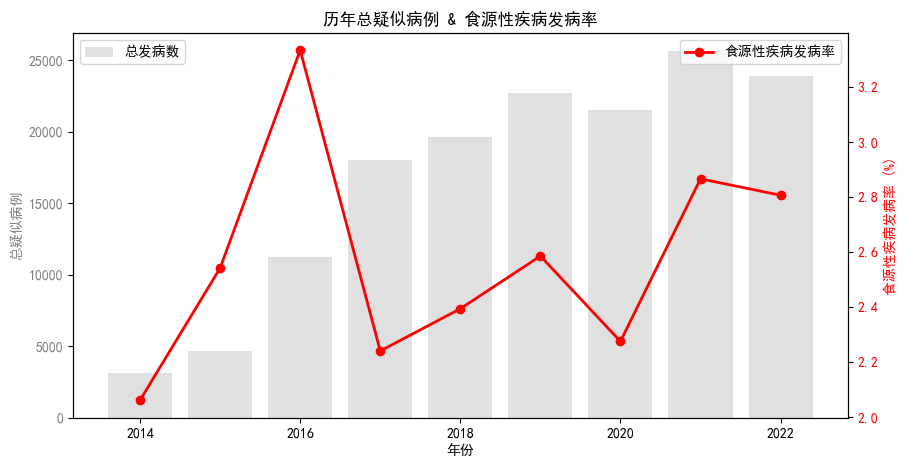

In [154]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题

fig, ax1 = plt.subplots(figsize=(10, 5))

# 左轴：总发病数（柱状图）
ax1.bar(yearly_total_cases.index, yearly_total_cases, color='lightgray', alpha=0.7, label="总发病数")
ax1.set_xlabel("年份")
ax1.set_ylabel("总疑似病例", color="gray")
ax1.tick_params(axis='y', labelcolor="gray")

# 右轴：食源性疾病发病率（折线图）
ax2 = ax1.twinx()
ax2.plot(yearly_foodborne_rate.index, yearly_foodborne_rate, color="red", marker="o", linestyle="-", linewidth=2, label="食源性疾病发病率")
ax2.set_ylabel("食源性疾病发病率 (%)", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# 添加标题 & 图例
plt.title("历年总疑似病例 & 食源性疾病发病率")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# 显示图表
plt.show()


In [96]:
df.keys()

Index([' 患者ID', '是否复诊', '是否住院', '患者性别', '患者年龄', '发病日期', '是否采集生物样本', '其他人是否发病',
       '降水量', 'Temperature-before1day', 'Temperature-before2day',
       'Temperature-before3day', 'Temperature-before4day',
       'Temperature-before5day', 'Temperature-before6day',
       'Temperature-before7day', '气候政策不确定性指数', '环保处罚案件数目', 'AQI', '质量等级',
       '经济核算-生产总值（亿元）', '经济核算-人均生产总值（元）', '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）',
       '农业-农、林、牧、渔业总产值（亿元）-农业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-林业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-牧业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-渔业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-农林牧渔业服务业产值（亿元）', '农业-主要农产品产量-肉产量（吨）',
       '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）', '农业-主要农产品产量-禽蛋产量（吨）', '农业-主要农产品产量-牛奶产量（吨）',
       '农业-水产品产量（万吨）-海水产品产量（万吨）', '农业-水产品产量（万吨）-淡水产品产量（万吨）',
       '农业-农村能源及农业物资消耗-农药使用量（吨）', '文化、卫生和社会服务-文化和卫生-医院卫生院数（个）',
       '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）', '文化、卫生和社会服务-文化和卫生-医生数（人）',
       '环境与资源-日照时数-1月日照时数（0.1小时）', '环境与资源-日照时数-2月日照时数（0.1小时）',
       '环境与资源-日照时数-3月日照时数（0.1小时）', '环境与资源-日照时数-4月日照时数

# xgboost analysis

In [101]:
df['发病日期'] = pd.to_datetime(df['发病日期'])  # 确保是 datetime 格式

# 按日期聚合，求和病例数，取平均值的数值特征
df_daily = df.groupby('发病日期').agg({
    ' 患者ID': "count",
    '今日确诊数': 'sum',  # 病例数求和
    '患者年龄': 'median',
    '降水量': 'mean',  # 气象类数据求均值
    **{col: 'mean' for col in df.columns if 'Temperature-before' in col},
    'AQI': 'mean',
    '气候政策不确定性指数': 'mean',
    '环保处罚案件数目': 'mean',
    '质量等级': 'mean',
    '经济核算-人均生产总值（元）': 'mean',
    '经济核算-生产总值（亿元）': 'mean',
    '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）': 'mean',
    **{col: 'mean' for col in df.columns if '农业-农、林、牧、渔业总产值（亿元）-' in col},
    **{col: 'mean' for col in df.columns if '农业-主要农产品产量' in col},
    **{col: 'mean' for col in df.columns if '农业-水产品产量（万吨）' in col},
    '农业-农村能源及农业物资消耗-农药使用量（吨）': 'mean',
    **{col: 'mean' for col in df.columns if '文化、卫生和社会服务-文化和卫生-' in col},
    **{col: 'mean' for col in df.columns if '环境与资源-日照时数-' in col},
    
    # 对于 One-Hot 编码变量，通常采用求和（代表该类出现的次数）
    **{col: 'sum' for col in df.columns if '现在住址地市_' in col  or '食品分类_' in col or '加工及包装方式_' in col 
       or '进食场所类型_' in col },
    '进食-发病时间差': 'mean',
    '总户数（万户）': 'mean',
    '总人口数（万人）': 'mean',
    '男性人数': 'mean',
    '女性人数': 'mean'
}).reset_index()

## 计算比例

In [102]:
df_daily = df_daily.rename(columns={' 患者ID': '今日疑似病例'}).reset_index()

In [103]:
df_daily

,index,发病日期,今日疑似病例,今日确诊数,患者年龄,降水量,Temperature-before1day,Temperature-before2day,Temperature-before3day,Temperature-before4day,...,进食场所类型_学校,进食场所类型_家庭,进食场所类型_集体食堂,进食场所类型_零售市场,进食场所类型_餐饮服务业,进食-发病时间差,总户数（万户）,总人口数（万人）,男性人数,女性人数
0,0,2014-01-01,5,0,28.0,0.0,7.166082,4.967755,2.108965,1.521264,...,0,4,0,0,0,0.000000,1630.49,4859.18,2458.69,2400.49
1,1,2014-01-02,4,0,44.0,0.0,7.181190,6.308976,4.280187,1.519211,...,0,4,0,0,0,0.750000,1630.49,4859.18,2458.69,2400.49
2,2,2014-01-03,7,1,26.0,0.0,10.429443,7.828679,6.755278,4.756202,...,0,6,0,0,0,0.571429,1630.49,4859.18,2458.69,2400.49
3,3,2014-01-04,4,0,39.0,0.0,9.981534,9.472053,6.894867,6.454693,...,0,1,0,0,0,-91.000000,1630.49,4859.18,2458.69,2400.49
4,4,2014-01-05,5,0,33.0,0.0,6.859940,11.233741,10.675601,7.667924,...,0,2,0,0,0,0.800000,1630.49,4859.18,2458.69,2400.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,3282,2022-12-27,29,0,35.0,0.0,5.473782,3.690368,3.896489,3.004157,...,0,18,0,0,1,0.344828,1778.02,5110.51,2561.04,2549.47
3283,3283,2022-12-28,48,0,41.0,0.0,6.592343,5.437744,3.674198,3.966224,...,0,34,0,0,2,1.000000,1778.02,5110.51,2561.04,2549.47
3284,3284,2022-12-29,26,0,39.5,0.0,6.695457,7.031043,5.966081,4.023821,...,0,10,0,1,2,0.269231,1778.02,5110.51,2561.04,2549.47
3285,3285,2022-12-30,29,0,50.0,0.0,4.314141,5.873921,6.540658,5.304397,...,0,20,0,0,1,0.275862,1778.02,5110.51,2561.04,2549.47


In [ ]:
df_daily['男性确诊比例'] = df.groupby('发病日期')['患者性别'].apply(lambda x: (x == 1).mean()).reset_index(drop=True)
df_daily['复诊比例'] = df.groupby('发病日期')['是否复诊'].mean().reset_index(drop=True)
df_daily['住院比例'] = df.groupby('发病日期')['是否住院'].mean().reset_index(drop=True)


In [105]:
df_daily = df_daily.set_index('发病日期').reset_index()

In [ ]:
df_daily = df_daily.drop(columns=['index'], errors='ignore')
df_daily

,发病日期,今日疑似病例,今日确诊数,患者年龄,降水量,Temperature-before1day,Temperature-before2day,Temperature-before3day,Temperature-before4day,Temperature-before5day,...,进食场所类型_零售市场,进食场所类型_餐饮服务业,进食-发病时间差,总户数（万户）,总人口数（万人）,男性人数,女性人数,男性确诊比例,复诊比例,住院比例
0,2014-01-01,5,0,28.0,0.0,7.166082,4.967755,2.108965,1.521264,0.862639,...,0,0,0.000000,1630.49,4859.18,2458.69,2400.49,0.600000,0.000000,0.400000
1,2014-01-02,4,0,44.0,0.0,7.181190,6.308976,4.280187,1.519211,0.204049,...,0,0,0.750000,1630.49,4859.18,2458.69,2400.49,0.500000,0.000000,0.000000
2,2014-01-03,7,1,26.0,0.0,10.429443,7.828679,6.755278,4.756202,2.167790,...,0,0,0.571429,1630.49,4859.18,2458.69,2400.49,0.857143,0.000000,0.142857
3,2014-01-04,4,0,39.0,0.0,9.981534,9.472053,6.894867,6.454693,4.397175,...,0,0,-91.000000,1630.49,4859.18,2458.69,2400.49,0.750000,0.000000,0.250000
4,2014-01-05,5,0,33.0,0.0,6.859940,11.233741,10.675601,7.667924,6.696962,...,0,0,0.800000,1630.49,4859.18,2458.69,2400.49,0.600000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2022-12-27,29,0,35.0,0.0,5.473782,3.690368,3.896489,3.004157,5.613745,...,0,1,0.344828,1778.02,5110.51,2561.04,2549.47,0.517241,0.034483,0.000000
3283,2022-12-28,48,0,41.0,0.0,6.592343,5.437744,3.674198,3.966224,3.004408,...,0,2,1.000000,1778.02,5110.51,2561.04,2549.47,0.604167,0.020833,0.020833
3284,2022-12-29,26,0,39.5,0.0,6.695457,7.031043,5.966081,4.023821,4.522424,...,1,2,0.269231,1778.02,5110.51,2561.04,2549.47,0.461538,0.115385,0.000000
3285,2022-12-30,29,0,50.0,0.0,4.314141,5.873921,6.540658,5.304397,3.480851,...,0,1,0.275862,1778.02,5110.51,2561.04,2549.47,0.448276,0.000000,0.000000


In [107]:
df_daily.keys()

Index(['发病日期', '今日疑似病例', '今日确诊数', '患者年龄', '降水量', 'Temperature-before1day',
       'Temperature-before2day', 'Temperature-before3day',
       'Temperature-before4day', 'Temperature-before5day',
       'Temperature-before6day', 'Temperature-before7day', 'AQI', '气候政策不确定性指数',
       '环保处罚案件数目', '质量等级', '经济核算-人均生产总值（元）', '经济核算-生产总值（亿元）',
       '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）', '农业-农、林、牧、渔业总产值（亿元）-农业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-林业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-牧业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-渔业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-农林牧渔业服务业产值（亿元）',
       '农业-主要农产品产量-肉产量（吨）', '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）', '农业-主要农产品产量-禽蛋产量（吨）',
       '农业-主要农产品产量-牛奶产量（吨）', '农业-水产品产量（万吨）-海水产品产量（万吨）',
       '农业-水产品产量（万吨）-淡水产品产量（万吨）', '农业-农村能源及农业物资消耗-农药使用量（吨）',
       '文化、卫生和社会服务-文化和卫生-医院卫生院数（个）', '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）',
       '文化、卫生和社会服务-文化和卫生-医生数（人）', '环境与资源-日照时数-1月日照时数（0.1小时）',
       '环境与资源-日照时数-2月日照时数（0.1小时）', '环境与资源-日照时数-3月日照时数（0.1小时）',
       '环境与资源-日照时数-4月日照时数（0.1小时）', '环境与资源-日照时数-5月日照时数（0.1小时）',

In [108]:
df_daily.to_csv("data/dailydata.csv",encoding="utf-8-sig")

## 补齐缺失数据

In [109]:
df = pd.read_csv("data/dailydata.csv",encoding="utf-8-sig")

In [110]:
df['发病日期'] = pd.to_datetime(df['发病日期'])
df_daily = df[df['发病日期'].dt.year != 2013]

In [111]:
all_dates = pd.date_range(start=df_daily['发病日期'].min(), 
                          end=df_daily['发病日期'].max(), 
                          freq='D')

# 找出缺失的日期
missing_dates = all_dates.difference(df_daily['发病日期'])
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [112]:
len(missing_dates)

0

## XGBoost

In [113]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 确保 '发病日期' 是时间格式
df_daily['发病日期'] = pd.to_datetime(df_daily['发病日期'])

# 设置索引
df_daily = df_daily.set_index('发病日期').sort_index()

# 确保数值列没有缺失值
df_daily = df_daily.fillna(0)

In [115]:
df_daily['Target'] = df_daily['今日确诊数'].shift(-1)

In [116]:
features = [col for col in df_daily.columns if col not in ['Target']]

In [117]:
# 去掉最后一天（因为它的 Target 为空）
df_train = df_daily.iloc[:-1].copy()

# 划分训练集 & 测试集
X_train, X_test, y_train, y_test = train_test_split(
    df_train[features], df_train['Target'], test_size=0.2, shuffle=False
)

In [144]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 定义模型
model = xgb.XGBRegressor(
    max_depth=6,            # Slightly deeper tree depth for better learning
    n_estimators=100,       # More trees for better prediction accuracy
    learning_rate=0.1,      # Moderate learning rate to balance between speed and performance
    gamma=1,                # Lower gamma for more regularization (reduces overfitting)
    reg_lambda=10,          # Regularization parameter, slightly reduced to avoid over-penalizing
    reg_alpha=10,           # Regularization parameter for L1 (Lasso)
    subsample=0.8,          # Increase subsample to use more data for training
    colsample_bytree=0.7,   # Increase feature subsampling to prevent overfitting
    random_state=42         # Ensures reproducibility
)

# 训练模型
model.fit(X_train, y_train)

# 预测训练集和测试集
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 计算误差 (Train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)  # RMSE = sqrt(MSE)
non_zero_idx_train = y_train != 0  # Select indices where y_train is NOT zero
mape_train = np.mean(np.abs((y_train[non_zero_idx_train] - y_train_pred[non_zero_idx_train]) / y_train[non_zero_idx_train])) * 100

# 计算误差 (Test)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)  # RMSE = sqrt(MSE)
non_zero_idx_test = y_test != 0  # Select indices where y_test is NOT zero
mape_test = np.mean(np.abs((y_test[non_zero_idx_test] - y_test_pred[non_zero_idx_test]) / y_test[non_zero_idx_test])) * 100

# 打印结果
print(f"Train Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Train Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Train Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Train Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%")

print(f"Test Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Test Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Test Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")


Train Mean Absolute Error (MAE): 0.5112
Train Mean Squared Error (MSE): 0.5060
Train Root Mean Squared Error (RMSE): 0.7113
Train Mean Absolute Percentage Error (MAPE): 36.20%
Test Mean Absolute Error (MAE): 1.1858
Test Mean Squared Error (MSE): 2.5695
Test Root Mean Squared Error (RMSE): 1.6030
Test Mean Absolute Percentage Error (MAPE): 45.73%


In [145]:
df['今日确诊数'].mean()

np.float64(1.1898387587465775)

In [146]:
import matplotlib.pyplot as plt
import numpy as np

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 真实值
y_train_actual = np.array(y_train)
y_test_actual = np.array(y_test)


# 真实值 & 预测值
y_train_actual = np.array(y_train)  # 训练集真实值
y_train_pred = np.array(y_train_pred)  # 训练集预测值
y_test_actual = np.array(y_test)  # 测试集真实值
y_test_pred = np.array(y_test_pred)  # 测试集预测值


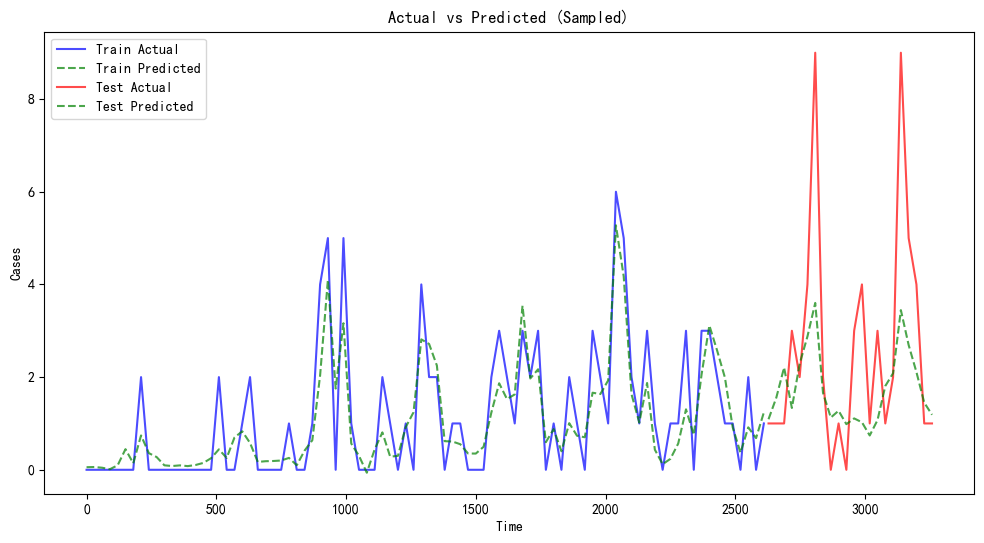

In [147]:
sampling_rate = 30

plt.figure(figsize=(12, 6))


plt.plot(range(0, len(y_train_actual), sampling_rate), y_train_actual[::sampling_rate], label="Train Actual", color="blue", alpha=0.7, linestyle="-")
plt.plot(range(0, len(y_train_pred), sampling_rate), y_train_pred[::sampling_rate], label="Train Predicted", color="green", alpha=0.7, linestyle="--")

# 测试集
test_start_idx = len(y_train_actual)
plt.plot(range(test_start_idx, test_start_idx + len(y_test_actual), sampling_rate), y_test_actual[::sampling_rate], label="Test Actual", color="red", alpha=0.7, linestyle="-")
plt.plot(range(test_start_idx, test_start_idx + len(y_test_pred), sampling_rate), y_test_pred[::sampling_rate], label="Test Predicted", color="green", alpha=0.7, linestyle="--")
plt.legend()
plt.title("Actual vs Predicted (Sampled)")
plt.xlabel("Time")
plt.ylabel("Cases")
plt.show()

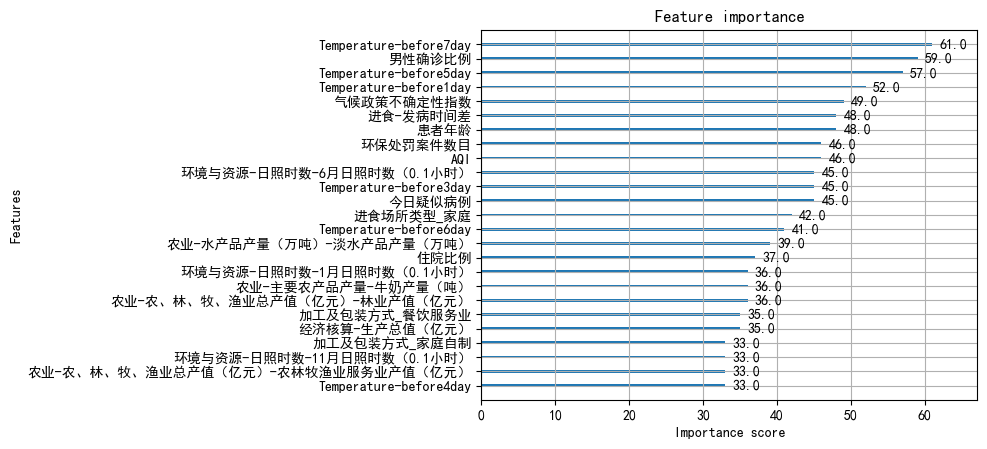

In [148]:
import matplotlib.pyplot as plt
import xgboost as xgb

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题
# 获取特征重要性
xgb.plot_importance(model, max_num_features=25)  # 只显示前20个最重要的
plt.show()

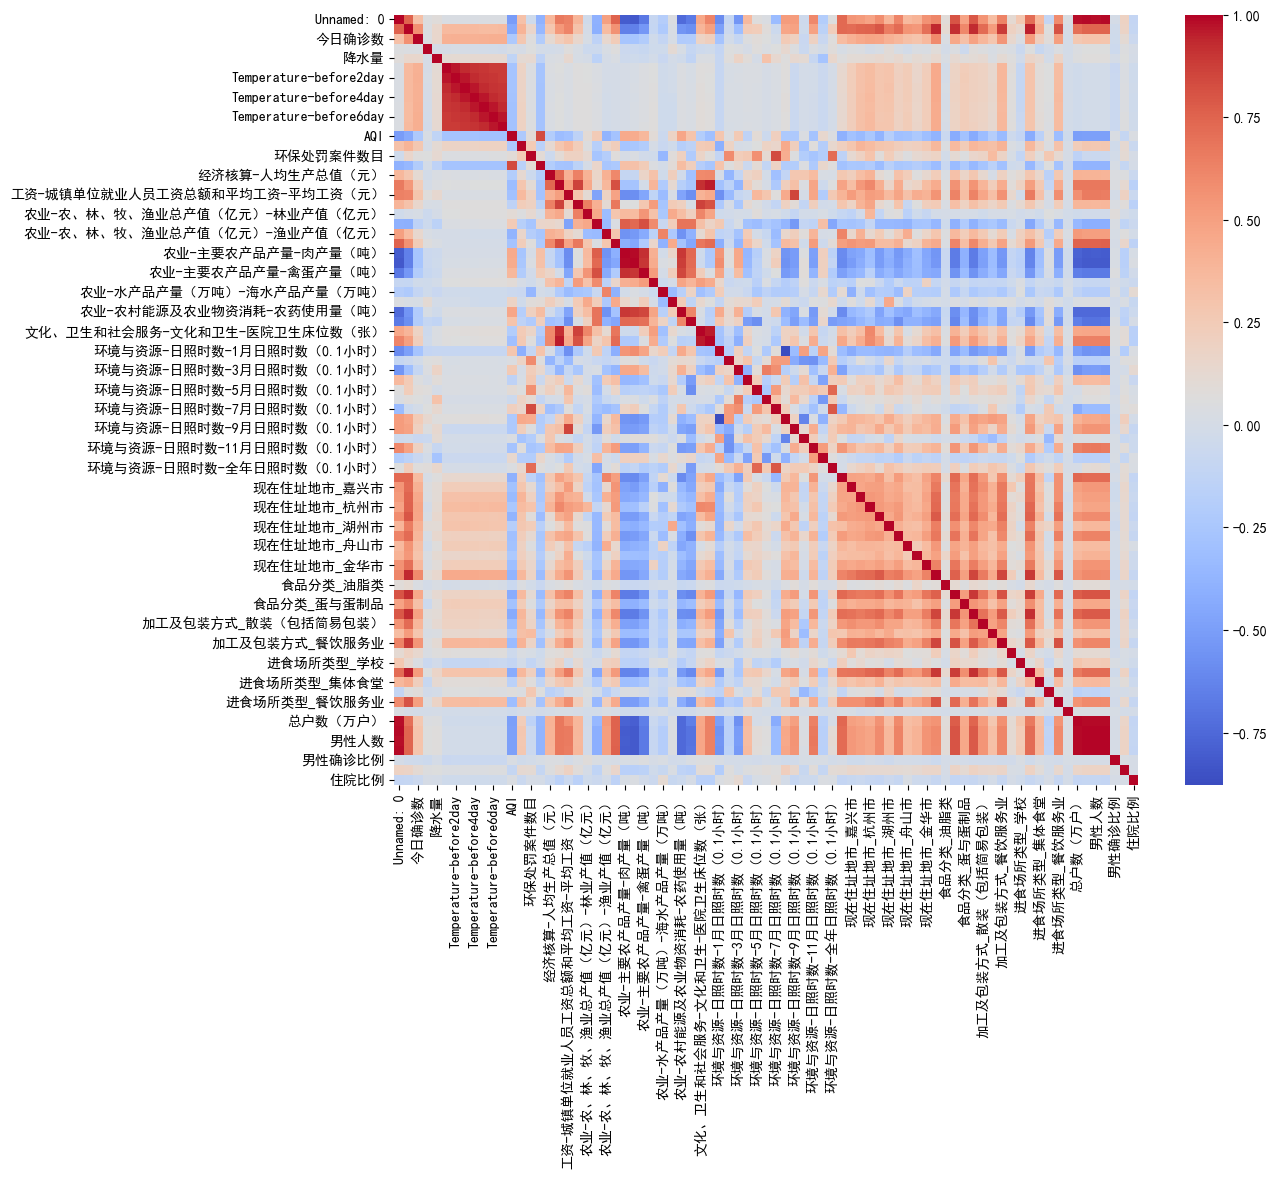

In [149]:
import seaborn as sns
import numpy as np

# 计算特征的相关性矩阵
corr_matrix = X_train.corr()

# 找出相关性大于 0.9 的特征对
high_corr_features = np.where(np.abs(corr_matrix) > 0.9)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.show()

In [150]:
# 找出相关性大于 0.9 的特征对
high_corr_features = set()
threshold = 0.9  # 相关性阈值

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print("高相关性特征:", high_corr_features)

高相关性特征: {'女性人数', 'Temperature-before3day', 'Temperature-before5day', 'Temperature-before6day', '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）', '农业-主要农产品产量-禽蛋产量（吨）', '食品分类_水产动物及其制品', '食品分类_肉与肉制品', '加工及包装方式_家庭自制', '总户数（万户）', '男性人数', 'Temperature-before7day', 'Temperature-before4day', '进食场所类型_家庭', '总人口数（万人）', 'Temperature-before2day', '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）', '文化、卫生和社会服务-文化和卫生-医生数（人）'}


In [151]:
X_train_filtered = X_train.drop(columns=high_corr_features)
X_test_filtered = X_test.drop(columns=high_corr_features)

print("原始特征数:", X_train.shape[1])
print("筛选后特征数:", X_train_filtered.shape[1])

原始特征数: 79
筛选后特征数: 61


In [152]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# 定义模型
model = xgb.XGBRegressor(
    max_depth=6,            # Slightly deeper tree depth for better learning
    n_estimators=300,       # More trees for better prediction accuracy
    learning_rate=0.1,     # Moderate learning rate to balance between speed and performance
    gamma=1,                # Lower gamma for more regularization (reduces overfitting)
    reg_lambda=10,          # Regularization parameter, slightly reduced to avoid over-penalizing
    reg_alpha=10,           # Regularization parameter for L1 (Lasso)
    subsample=0.8,          # Increase subsample to use more data for training
    colsample_bytree=0.7,   # Increase feature subsampling to prevent overfitting
    random_state=42         # Ensures reproducibility
)

# 训练模型
model.fit(X_train_filtered, y_train)

# 预测训练集 & 测试集
y_train_pred = model.predict(X_train_filtered)
y_test_pred = model.predict(X_test_filtered)

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算误差 (Train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)  # RMSE = sqrt(MSE)
non_zero_idx_train = y_train != 0  # Select indices where y_train is NOT zero
mape_train = np.mean(np.abs((y_train[non_zero_idx_train] - y_train_pred[non_zero_idx_train]) / y_train[non_zero_idx_train])) * 100

# 计算误差 (Test)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)  # RMSE = sqrt(MSE)
non_zero_idx_test = y_test != 0  # Select indices where y_test is NOT zero
mape_test = np.mean(np.abs((y_test[non_zero_idx_test] - y_test_pred[non_zero_idx_test]) / y_test[non_zero_idx_test])) * 100

# 打印结果
print(f"Train Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Train Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Train Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Train Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%")

print(f"Test Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Test Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Test Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")


Train Mean Absolute Error (MAE): 0.4841
Train Mean Squared Error (MSE): 0.4552
Train Root Mean Squared Error (RMSE): 0.6747
Train Mean Absolute Percentage Error (MAPE): 34.10%
Test Mean Absolute Error (MAE): 1.1943
Test Mean Squared Error (MSE): 2.6011
Test Root Mean Squared Error (RMSE): 1.6128
Test Mean Absolute Percentage Error (MAPE): 48.32%


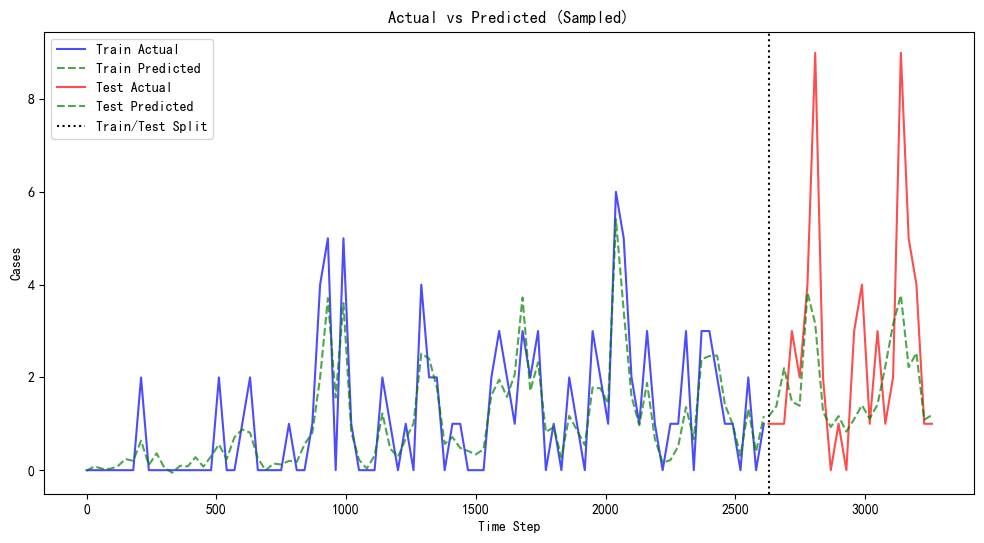

In [155]:
import matplotlib.pyplot as plt

sampling_rate = 30  # 每 30 个点采样 1 个

plt.figure(figsize=(12, 6))

# 创建 X 轴时间步（降采样）
train_steps = range(len(y_train))
test_steps = range(len(y_train), len(y_train) + len(y_test))

# 采样
train_steps_sampled = train_steps[::sampling_rate]
y_train_actual_sampled = y_train.values[::sampling_rate]
y_train_pred_sampled = y_train_pred[::sampling_rate]

test_steps_sampled = test_steps[::sampling_rate]
y_test_actual_sampled = y_test.values[::sampling_rate]
y_test_pred_sampled = y_test_pred[::sampling_rate]

# 训练集
plt.plot(train_steps_sampled, y_train_actual_sampled, label="Train Actual", alpha=0.7, color="blue")
plt.plot(train_steps_sampled, y_train_pred_sampled, label="Train Predicted", linestyle="dashed", alpha=0.7, color="green")

# 测试集
plt.plot(test_steps_sampled, y_test_actual_sampled, label="Test Actual", alpha=0.7, color="red")
plt.plot(test_steps_sampled, y_test_pred_sampled, label="Test Predicted", linestyle="dashed", alpha=0.7, color="green")

# 添加分界线
plt.axvline(x=len(y_train), color="black", linestyle="dotted", label="Train/Test Split")

# 轴标签 & 标题
plt.xlabel("Time Step")
plt.ylabel("Cases")
plt.title("Actual vs Predicted (Sampled)")
plt.legend()
plt.show()


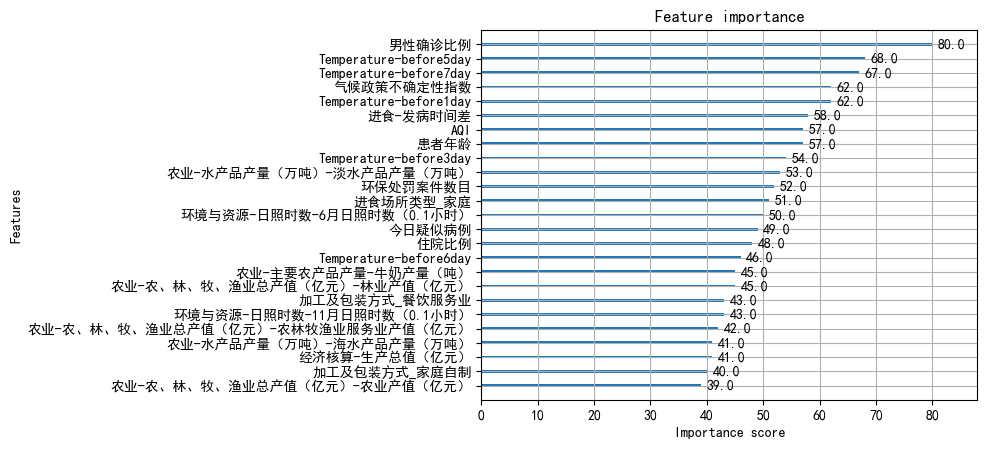

In [156]:
import matplotlib.pyplot as plt
import xgboost as xgb

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题
# 获取特征重要性
xgb.plot_importance(model, max_num_features=25)  # 只显示前20个最重要的
plt.show()

# 分地区计算

In [159]:
city_dfs['台州市']

,患者ID,是否复诊,是否住院,患者性别,患者年龄,发病日期,是否采集生物样本,其他人是否发病,降水量,Temperature-before1day,...,进食场所类型_家庭,进食场所类型_集体食堂,进食场所类型_零售市场,进食场所类型_餐饮服务业,进食-发病时间差,今日确诊数,总户数（万户）,总人口数（万人）,男性人数,女性人数
4,6,1,0,1,35.0,2018-04-26,0,0,0.000000,17.205077,...,0,0,0,1,0.0,0,1694.80,4999.84,2517.95,2481.89
22,36,0,0,0,41.0,2018-11-27,0,0,0.038809,14.889340,...,1,0,0,0,0.0,0,1694.80,4999.84,2517.95,2481.89
39,55,0,0,1,77.0,2019-08-20,0,0,0.000000,28.388834,...,1,0,0,0,0.0,0,1715.29,5038.91,2535.05,2503.87
106,131,0,0,0,17.0,2021-11-22,0,0,0.000000,15.648485,...,0,0,0,0,0.0,0,1764.71,5095.78,2556.86,2538.91
126,156,0,0,1,18.0,2018-03-26,0,0,0.000000,15.797296,...,0,0,0,1,0.0,0,1694.80,4999.84,2517.95,2481.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149939,176616,0,0,1,28.0,2022-03-19,0,0,0.000000,12.731180,...,1,0,0,0,2.0,0,1778.02,5110.51,2561.04,2549.47
149940,176617,0,0,0,23.0,2022-07-26,0,0,0.000000,29.443726,...,1,0,0,0,0.0,0,1778.02,5110.51,2561.04,2549.47
149948,176628,0,0,1,25.0,2021-07-12,1,0,0.000000,29.340035,...,0,0,0,1,1.0,1,1764.71,5095.78,2556.86,2538.91
150083,176780,0,0,0,48.0,2021-11-04,0,0,0.000000,17.391476,...,1,0,0,0,0.0,0,1764.71,5095.78,2556.86,2538.91


City: 台州市, Confirmed Cases Rate: 2.344540%
Yearly Foodborne Rate for 台州市:
Year
2014    2.666667
2015    1.365188
2016    2.480916
2017    3.411676
2018    2.151984
2019    2.640513
2020    1.816502
2021    2.347781
2022    2.333436
dtype: float64
Yearly Record Count for 台州市:
Year
2021    3876
2022    3257
2020    3248
2019    2651
2018    1487
2017    1319
2016     524
2015     293
2014     150
Name: count, dtype: int64


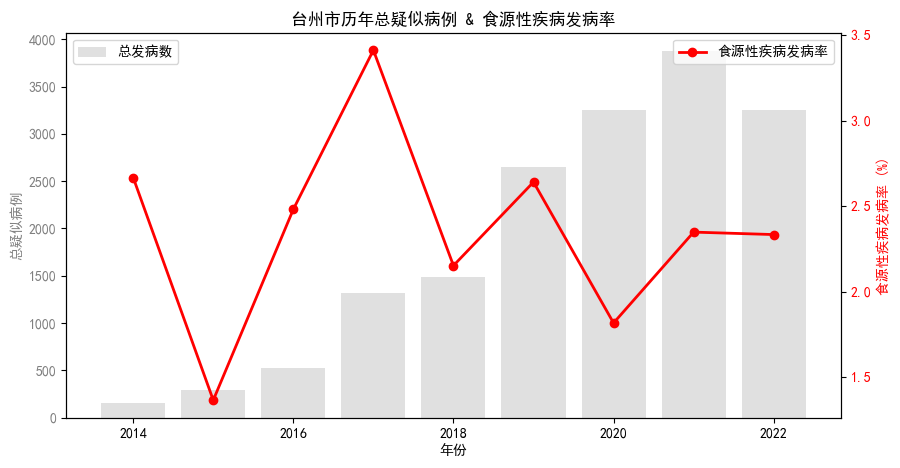

City: 嘉兴市, Confirmed Cases Rate: 2.478103%
Yearly Foodborne Rate for 嘉兴市:
Year
2014    3.773585
2015    4.807692
2016    2.625821
2017    1.641266
2018    2.027027
2019    2.183236
2020    1.883830
2021    3.327338
2022    2.900107
dtype: float64
Yearly Record Count for 嘉兴市:
Year
2019    2565
2021    2224
2020    1911
2022    1862
2018    1776
2017    1706
2016    1371
2015     416
2014     212
Name: count, dtype: int64


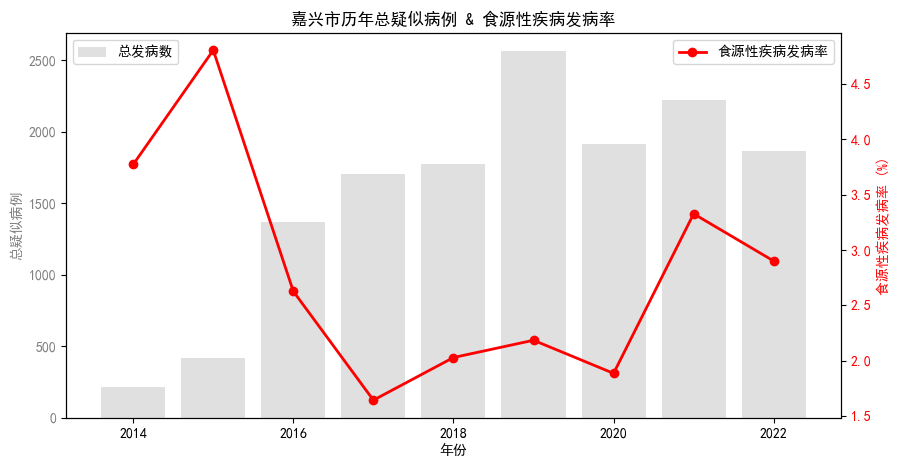

City: 宁波市, Confirmed Cases Rate: 2.970519%
Yearly Foodborne Rate for 宁波市:
Year
2014    1.182033
2015    6.730769
2016    5.740741
2017    2.258636
2018    2.514088
2019    2.729636
2020    2.783222
2021    3.028241
2022    2.062589
dtype: float64
Yearly Record Count for 宁波市:
Year
2021    2939
2022    2812
2020    2551
2019    2308
2018    2307
2017    2258
2016    1620
2015     624
2014     423
Name: count, dtype: int64


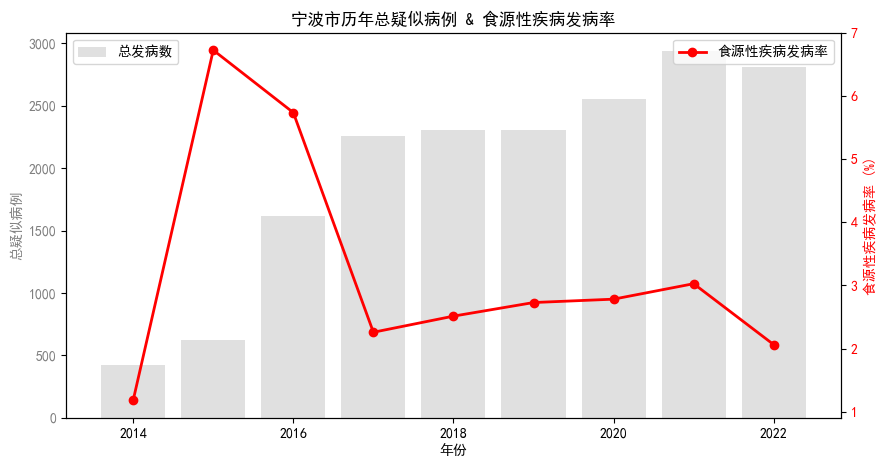

City: 杭州市, Confirmed Cases Rate: 2.164822%
Yearly Foodborne Rate for 杭州市:
Year
2014    1.881331
2015    0.922266
2016    2.676240
2017    1.582905
2018    1.417881
2019    1.722243
2020    1.352459
2021    2.946224
2022    3.322259
dtype: float64
Yearly Record Count for 杭州市:
Year
2022    3612
2021    3496
2019    2729
2018    2539
2017    2527
2020    2440
2016    1532
2015     759
2014     691
Name: count, dtype: int64


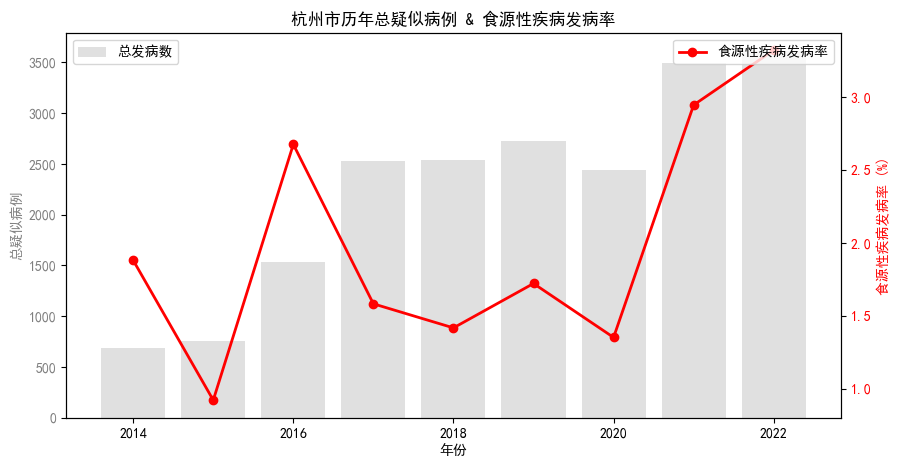

City: 温州市, Confirmed Cases Rate: 3.127161%
Yearly Foodborne Rate for 温州市:
Year
2014    3.234501
2015    0.777202
2016    3.503427
2017    2.683732
2018    3.777403
2019    3.067485
2020    2.697968
2021    3.211517
2022    3.349448
dtype: float64
Yearly Record Count for 温州市:
Year
2021    3612
2019    3423
2018    2965
2022    2896
2020    2854
2017    2422
2016    1313
2015     386
2014     371
Name: count, dtype: int64


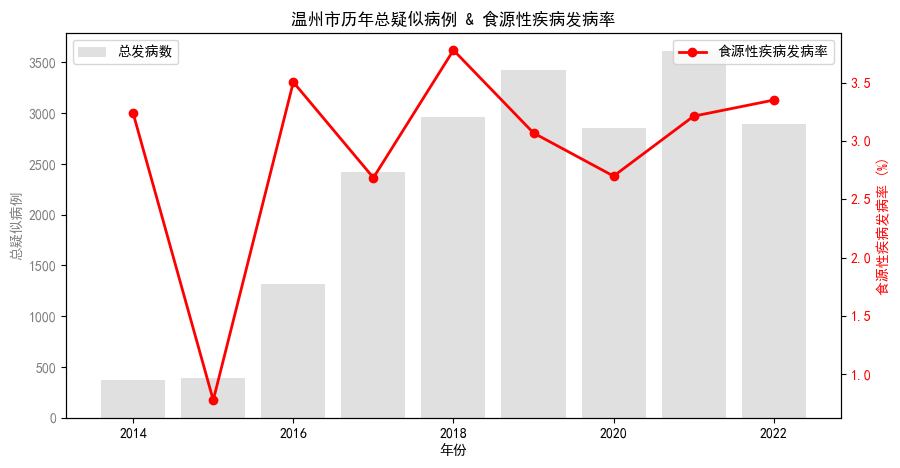

City: 湖州市, Confirmed Cases Rate: 2.794364%
Yearly Foodborne Rate for 湖州市:
Year
2014    2.147239
2015    2.669039
2016    3.904110
2017    2.675761
2018    3.133441
2019    2.385212
2020    2.337334
2021    1.842665
2022    3.361345
dtype: float64
Yearly Record Count for 湖州市:
Year
2017    1906
2018    1851
2022    1785
2019    1677
2020    1583
2016    1460
2021    1411
2015     562
2014     326
Name: count, dtype: int64


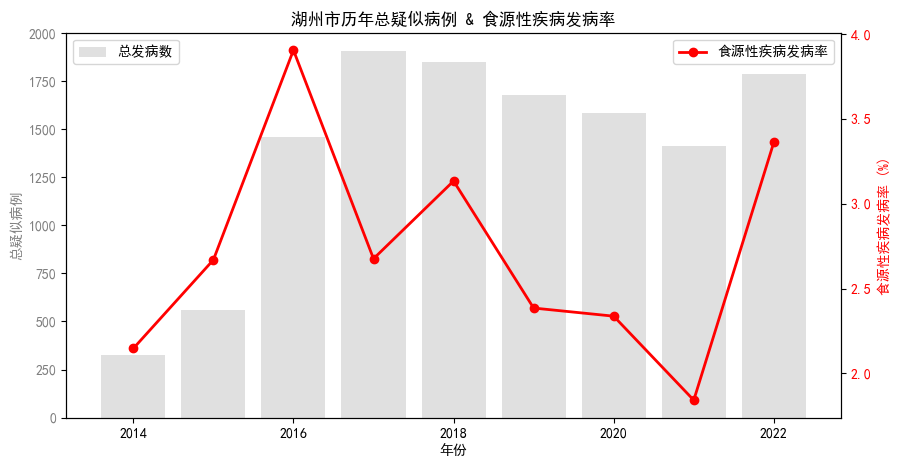

City: 绍兴市, Confirmed Cases Rate: 2.447969%
Yearly Foodborne Rate for 绍兴市:
Year
2014    0.000000
2015    1.351351
2016    2.209945
2017    2.530612
2018    2.514970
2019    3.250000
2020    2.519496
2021    2.215190
2022    2.044444
dtype: float64
Yearly Record Count for 绍兴市:
Year
2022    2250
2021    2212
2018    1670
2020    1667
2019    1600
2017    1225
2016     181
2015      74
2014      28
Name: count, dtype: int64


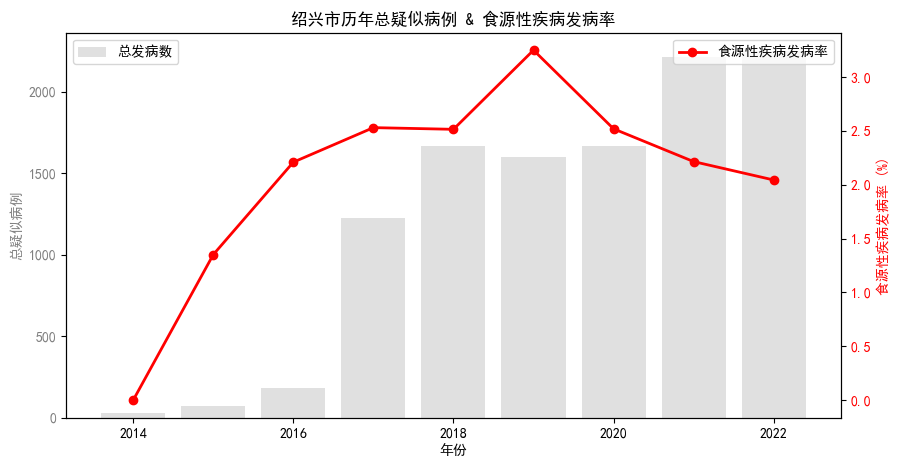

City: 舟山市, Confirmed Cases Rate: 2.487629%
Yearly Foodborne Rate for 舟山市:
Year
2014    1.769912
2015    1.754386
2016    2.847571
2017    1.831897
2018    1.477833
2019    3.795066
2020    1.673228
2021    2.807971
2022    3.512195
dtype: float64
Yearly Record Count for 舟山市:
Year
2021    1104
2019    1054
2022    1025
2020    1016
2018    1015
2017     928
2016     597
2015     399
2014     339
Name: count, dtype: int64


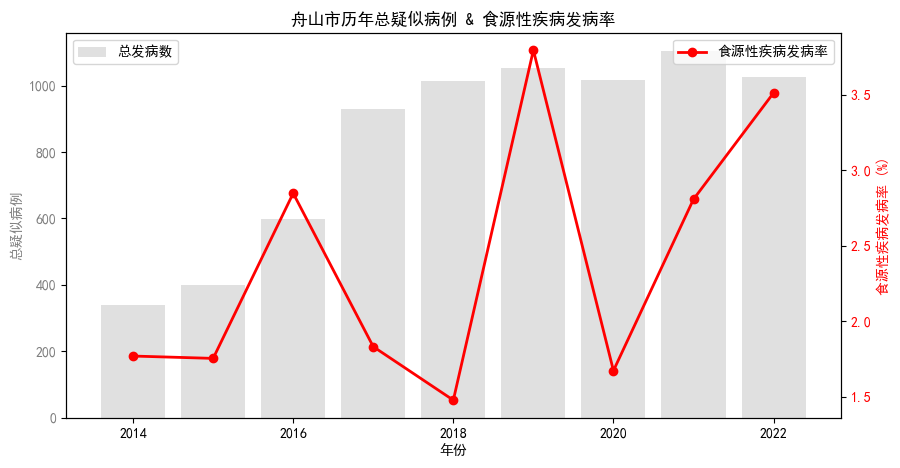

City: 衢州市, Confirmed Cases Rate: 2.919255%
Yearly Foodborne Rate for 衢州市:
Year
2014    2.083333
2015    0.787402
2016    2.842377
2017    3.369066
2018    2.853746
2019    2.666667
2020    2.529511
2021    3.301238
2022    3.338633
dtype: float64
Yearly Record Count for 衢州市:
Year
2018    841
2019    825
2021    727
2017    653
2022    629
2020    593
2016    387
2015    127
2014     48
Name: count, dtype: int64


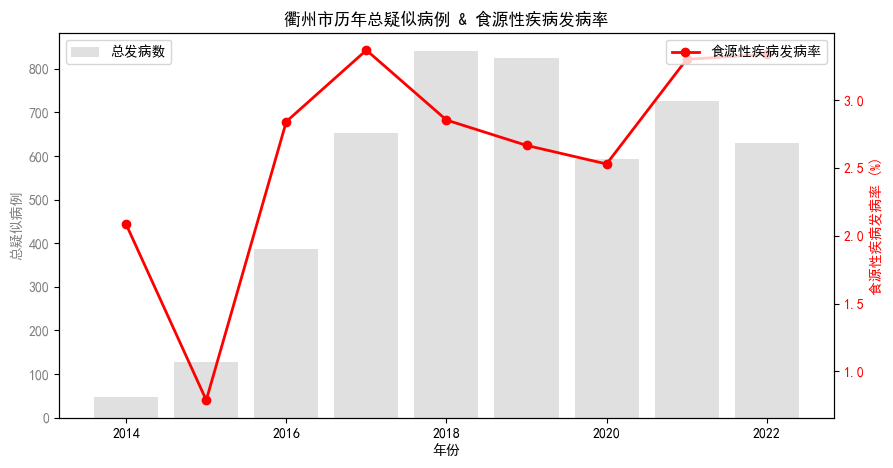

City: 金华市, Confirmed Cases Rate: 2.178859%
Yearly Foodborne Rate for 金华市:
Year
2014    2.403846
2015    1.120448
2016    2.185090
2017    1.417129
2018    2.063185
2019    2.246509
2020    2.766798
2021    2.655827
2022    2.002427
dtype: float64
Yearly Record Count for 金华市:
Year
2021    1845
2020    1771
2022    1648
2019    1647
2017    1623
2018    1551
2016     778
2015     357
2014     208
Name: count, dtype: int64


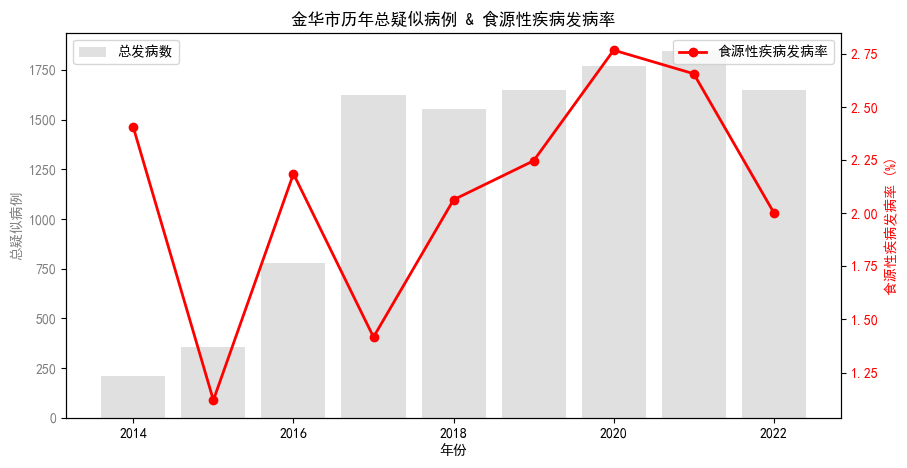

In [161]:
# Loop through each city dataframe
for city in city_dfs:
    df = city_dfs[city]

    # Calculate the percentage of confirmed cases
    foodborne_rate_percentage = f"{(df['今日确诊数'].sum() / len(df)) * 100:2f}%"
    print(f"City: {city}, Confirmed Cases Rate: {foodborne_rate_percentage}")

    # Ensure the '发病日期' column is in datetime format
    df['发病日期'] = pd.to_datetime(df['发病日期'])

    # Extract the year from the '发病日期' column
    df['Year'] = df['发病日期'].dt.year

    # Calculate the total number of cases and the number of foodborne cases per year
    yearly_total_cases = df.groupby('Year')['发病日期'].count()  # Total cases per year
    yearly_foodborne_cases = df.groupby('Year')['今日确诊数'].sum()  # Foodborne cases per year

    # Calculate the foodborne disease rate (percentage)
    yearly_foodborne_rate = (yearly_foodborne_cases / yearly_total_cases) * 100

    # Print the yearly foodborne rate and the count of records for each year
    print(f"Yearly Foodborne Rate for {city}:")
    print(yearly_foodborne_rate)
    
    # Print the number of entries (count) for each year
    print(f"Yearly Record Count for {city}:")
    print(df['Year'].value_counts())

    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # 左轴：总发病数（柱状图）
    ax1.bar(yearly_total_cases.index, yearly_total_cases, color='lightgray', alpha=0.7, label="总发病数")
    ax1.set_xlabel("年份")
    ax1.set_ylabel("总疑似病例", color="gray")
    ax1.tick_params(axis='y', labelcolor="gray")

    # 右轴：食源性疾病发病率（折线图）
    ax2 = ax1.twinx()
    ax2.plot(yearly_foodborne_rate.index, yearly_foodborne_rate, color="red", marker="o", linestyle="-", linewidth=2, label="食源性疾病发病率")
    ax2.set_ylabel("食源性疾病发病率 (%)", color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    # 添加标题 & 图例
    plt.title(f"{city}历年总疑似病例 & 食源性疾病发病率")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    # 显示图表
    plt.show()

In [181]:
city_dfs_daily = {}

for city in city_dfs:
    df = city_dfs[city]
    df['发病日期'] = pd.to_datetime(df['发病日期'])  # 确保是 datetime 格式

    # 按日期聚合，求和病例数，取平均值的数值特征
    df_daily = df.groupby('发病日期').agg({
        ' 患者ID': "count",
        '今日确诊数': 'sum',  # 病例数求和
        '患者年龄': 'median',
        '降水量': 'mean',  # 气象类数据求均值
        **{col: 'mean' for col in df.columns if 'Temperature-before' in col},
        'AQI': 'mean',
        '气候政策不确定性指数': 'mean',
        '环保处罚案件数目': 'mean',
        '质量等级': 'mean',
        '经济核算-人均生产总值（元）': 'mean',
        '经济核算-生产总值（亿元）': 'mean',
        '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）': 'mean',
        **{col: 'mean' for col in df.columns if '农业-农、林、牧、渔业总产值（亿元）-' in col},
        **{col: 'mean' for col in df.columns if '农业-主要农产品产量' in col},
        **{col: 'mean' for col in df.columns if '农业-水产品产量（万吨）' in col},
        '农业-农村能源及农业物资消耗-农药使用量（吨）': 'mean',
        **{col: 'mean' for col in df.columns if '文化、卫生和社会服务-文化和卫生-' in col},
        **{col: 'mean' for col in df.columns if '环境与资源-日照时数-' in col},
        
        # 对于 One-Hot 编码变量，通常采用求和（代表该类出现的次数）
        **{col: 'sum' for col in df.columns if '现在住址地市_' in col  or '食品分类_' in col or '加工及包装方式_' in col 
        or '进食场所类型_' in col },
        '进食-发病时间差': 'mean',
        '总户数（万户）': 'mean',
        '总人口数（万人）': 'mean',
        '男性人数': 'mean',
        '女性人数': 'mean'
    }).reset_index()

    df_daily = df_daily.rename(columns={' 患者ID': '今日疑似病例'}).reset_index()
    df_daily['男性确诊比例'] = df.groupby('发病日期')['患者性别'].apply(lambda x: (x == 1).mean()).reset_index(drop=True)
    df_daily['复诊比例'] = df.groupby('发病日期')['是否复诊'].mean().reset_index(drop=True)
    df_daily['住院比例'] = df.groupby('发病日期')['是否住院'].mean().reset_index(drop=True)
    all_dates = pd.date_range(start=df_daily['发病日期'].min(), 
                          end=df_daily['发病日期'].max(), 
                          freq='D')
    df_daily = df_daily.set_index('发病日期').reset_index()
    df_daily = df_daily.drop(columns=['index'], errors='ignore')
    # 找出缺失的日期
    missing_dates = all_dates.difference(df_daily['发病日期'])
    print(city,missing_dates)
    df_daily.to_csv(f"data/{city}_dailydata.csv",encoding="utf-8-sig")
    city_dfs_daily[city] = df_daily

台州市 DatetimeIndex(['2014-01-04', '2014-01-05', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-10', '2014-01-11', '2014-01-12',
               '2014-01-13', '2014-01-14',
               ...
               '2018-09-30', '2018-11-17', '2018-12-06', '2019-05-02',
               '2019-07-05', '2020-01-28', '2020-01-30', '2022-08-13',
               '2022-12-09', '2022-12-27'],
              dtype='datetime64[ns]', length=606, freq=None)
嘉兴市 DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-04', '2014-01-06',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-12', '2014-01-14',
               ...
               '2022-05-10', '2022-06-25', '2022-10-18', '2022-12-06',
               '2022-12-15', '2022-12-17', '2022-12-19', '2022-12-20',
               '2022-12-22', '2022-12-24'],
              dtype='datetime64[ns]', length=449, freq=None)
宁波市 DatetimeIndex(['2014-01-04', '2014-01-06', '2014-01-07', '2014-01-08',
               

In [182]:
city_dfs_daily['台州市'].keys()

Index(['发病日期', '今日疑似病例', '今日确诊数', '患者年龄', '降水量', 'Temperature-before1day',
       'Temperature-before2day', 'Temperature-before3day',
       'Temperature-before4day', 'Temperature-before5day',
       'Temperature-before6day', 'Temperature-before7day', 'AQI', '气候政策不确定性指数',
       '环保处罚案件数目', '质量等级', '经济核算-人均生产总值（元）', '经济核算-生产总值（亿元）',
       '工资-城镇单位就业人员工资总额和平均工资-平均工资（元）', '农业-农、林、牧、渔业总产值（亿元）-农业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-林业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-牧业产值（亿元）',
       '农业-农、林、牧、渔业总产值（亿元）-渔业产值（亿元）', '农业-农、林、牧、渔业总产值（亿元）-农林牧渔业服务业产值（亿元）',
       '农业-主要农产品产量-肉产量（吨）', '农业-主要农产品产量-肉产量（吨）-猪肉产量（吨）', '农业-主要农产品产量-禽蛋产量（吨）',
       '农业-主要农产品产量-牛奶产量（吨）', '农业-水产品产量（万吨）-海水产品产量（万吨）',
       '农业-水产品产量（万吨）-淡水产品产量（万吨）', '农业-农村能源及农业物资消耗-农药使用量（吨）',
       '文化、卫生和社会服务-文化和卫生-医院卫生院数（个）', '文化、卫生和社会服务-文化和卫生-医院卫生床位数（张）',
       '文化、卫生和社会服务-文化和卫生-医生数（人）', '环境与资源-日照时数-1月日照时数（0.1小时）',
       '环境与资源-日照时数-2月日照时数（0.1小时）', '环境与资源-日照时数-3月日照时数（0.1小时）',
       '环境与资源-日照时数-4月日照时数（0.1小时）', '环境与资源-日照时数-5月日照时数（0.1小时）',

## 补齐缺失数据

In [ ]:
columns_to_fill = [
    '男性确诊比例', '复诊比例', '住院比例', '今日疑似病例', '今日确诊数', '患者年龄',
    '食品分类_水产动物及其制品', '食品分类_油脂类', '食品分类_肉与肉制品', '食品分类_蛋与蛋制品',
    '加工及包装方式_家庭自制', '加工及包装方式_散装（包括简易包装）', '加工及包装方式_预包装',
    '加工及包装方式_餐饮服务业', '进食场所类型_农村宴席', '进食场所类型_学校', '进食场所类型_家庭',
    '进食场所类型_集体食堂', '进食场所类型_零售市场', '进食场所类型_餐饮服务业', '进食-发病时间差'
]

columns_to_drop = [
    '现在住址地市_台州市', '现在住址地市_嘉兴市', '现在住址地市_宁波市', '现在住址地市_杭州市', 
    '现在住址地市_温州市', '现在住址地市_湖州市', '现在住址地市_绍兴市', '现在住址地市_舟山市', 
    '现在住址地市_衢州市', '现在住址地市_金华市'
]

for city in city_dfs_daily:
    df = city_dfs_daily[city]
        # Ensure '发病日期' is in datetime format
    df['发病日期'] = pd.to_datetime(df['发病日期'])
    start_date = df['发病日期'].min()
    end_date = df['发病日期'].max()
    date_range = pd.date_range(start=start_date, end=end_date)

    # Sort by '发病日期' to ensure the previous day's data is filled properly
    df = df.sort_values('发病日期')
    df_full = pd.DataFrame(date_range, columns=['发病日期'])

    df = pd.merge(df_full, df, on='发病日期', how='left')

    # Loop through the rows and fill the zero values with the previous day's data
    for col in df.columns:
        if col in columns_to_fill:
            df[col] = df[col].replace(0, float('nan'))  # Replace zeros with NaN for easier forward fill
        df[col] = df[col].fillna(method='ffill')

    df = df.drop(columns=columns_to_drop)
    df.to_csv(f"data/{city}_dailydata.csv",encoding="utf-8-sig")
    city_dfs_daily[city] = df_daily


C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\3331035472.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')
C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\3331035472.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')
C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\3331035472.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')
C:\Users\AORUS\AppData\Local\Temp\ipykernel_15368\3331035472.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')
C:\Users\AORUS\AppData\L

### 计算每个城市当天的确诊比例

In [ ]:
for city in city_dfs_daily:
    df = city_dfs_daily[city]
    # 计算其他城市的确诊比例
    other_city_dfs = [other_df for other_city, other_df in city_dfs_daily.items() if other_city != city]
    
    # 将其他城市的确诊比例合并到当前城市的数据框
    for other_df in other_city_dfs:
        other_df['确诊比例'] = other_df['今日确诊数'] / other_df['今日疑似病例']
    
    # 将其他城市的数据合并到当前城市数据框中
    other_city_combined = pd.concat(other_city_dfs)
    
    # 按照日期进行合并，以便能添加其他城市的确诊比例到当前城市的数据框中
    df = pd.merge(df, other_city_combined[['发病日期', '确诊比例']], how='left', on='发病日期', suffixes=('', '_other'))
    
    # 更新回字典中
    city_dfs_daily[city] = df
    df.to_csv(f"data/{city}_dailydata.csv",encoding="utf-8-sig")

# CNN-LSTM

In [ ]:
import numpy as np

# 设定时间步（Timestep）
time_steps = 7  # 过去 7 天的数据预测下一天
features = X_train.shape[1]  # 获取特征数

# 重新构造 X 使其变成 (样本数, 时间步, 特征数)
def reshape_data(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = reshape_data(X_train.values, y_train.values, time_steps)
X_test_seq, y_test_seq = reshape_data(X_test.values, y_test.values, time_steps)

print(f"新 X_train 形状: {X_train_seq.shape}")  # (样本数, 时间步, 特征数)
print(f"新 y_train 形状: {y_train_seq.shape}")  # (样本数,)

新 X_train 形状: (2913, 7, 90)
新 y_train 形状: (2913,)


In [119]:
import torch
from torch.utils.data import Dataset, DataLoader


X_train_seq = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_seq = torch.tensor(y_train_seq, dtype=torch.float32).view(-1, 1)
X_test_seq = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_seq = torch.tensor(y_test_seq, dtype=torch.float32).view(-1, 1)

# 创建 DataLoader
batch_size = 32
train_loader = DataLoader(list(zip(X_train_seq, y_train_seq)), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(list(zip(X_test_seq, y_test_seq)), batch_size=batch_size, shuffle=False)

C:\Users\AORUS\AppData\Local\Temp\ipykernel_18828\112686205.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_seq = torch.tensor(X_train_seq, dtype=torch.float32)
C:\Users\AORUS\AppData\Local\Temp\ipykernel_18828\112686205.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_seq = torch.tensor(y_train_seq, dtype=torch.float32).view(-1, 1)
C:\Users\AORUS\AppData\Local\Temp\ipykernel_18828\112686205.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_seq = torch.tensor(X_test_seq, dtype=torch.float32)
C:\Users\AORUS\

In [132]:
import torch.nn as nn

class CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(CNN_LSTM, self).__init__()
        
        # CNN部分: 1D卷积 + 池化
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        # LSTM部分
        self.lstm = nn.LSTM(input_size=64, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)

        # 全连接层输出预测值
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # 调整形状: (batch, time_steps, features) → (batch, features, time_steps)
        x = self.pool(self.relu(self.conv1(x)))  # CNN 提取特征
        x = x.permute(0, 2, 1)  # 调整回 (batch, time_steps, features)
        
        x, _ = self.lstm(x)  # LSTM 处理时序
        x = self.fc(x[:, -1, :])  # 取最后一个时间步的输出
        return x

# 定义模型
input_size = features  # 特征数
hidden_size = 64
num_layers = 2
output_size = 1

model = CNN_LSTM(input_size, hidden_size, num_layers, output_size)


In [134]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error  # Fix 1
model = CNN_LSTM(input_size, hidden_size, num_layers, output_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_mae_list = []

# 损失函数 & 优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    y_train_true, y_train_preds = [], []

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        y_pred = model(X_batch)

        # Fix 2: Ensure y_batch shape is correct
        loss = criterion(y_pred, y_batch.view(-1, 1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Fix 3: Ensure data is in correct format for MAE
        y_train_true.extend(y_batch.cpu().numpy().flatten().tolist())
        y_train_preds.extend(y_pred.cpu().detach().numpy().flatten().tolist())

    # Compute MAE for this epoch
    epoch_mae = mean_absolute_error(y_train_true, y_train_preds)
    train_mae_list.append(epoch_mae)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}, MAE: {epoch_mae:.4f}")


Epoch [1/50], Loss: 27.5466, MAE: 3.9036
Epoch [2/50], Loss: 26.0792, MAE: 3.8257
Epoch [3/50], Loss: 26.3380, MAE: 3.8431
Epoch [4/50], Loss: 26.5521, MAE: 3.8212
Epoch [5/50], Loss: 26.3820, MAE: 3.8919
Epoch [6/50], Loss: 26.0963, MAE: 3.8234
Epoch [7/50], Loss: 28.8324, MAE: 3.8705
Epoch [8/50], Loss: 28.8778, MAE: 3.8816
Epoch [9/50], Loss: 26.3670, MAE: 3.8951
Epoch [10/50], Loss: 26.1379, MAE: 3.8486
Epoch [11/50], Loss: 26.3071, MAE: 3.8245
Epoch [12/50], Loss: 26.3488, MAE: 3.8143
Epoch [13/50], Loss: 26.3352, MAE: 3.8496
Epoch [14/50], Loss: 26.1563, MAE: 3.8242
Epoch [15/50], Loss: 26.3462, MAE: 3.8328
Epoch [16/50], Loss: 26.1126, MAE: 3.8423
Epoch [17/50], Loss: 26.1430, MAE: 3.8254
Epoch [18/50], Loss: 26.1541, MAE: 3.8489
Epoch [19/50], Loss: 26.1767, MAE: 3.8260
Epoch [20/50], Loss: 26.0804, MAE: 3.8347
Epoch [21/50], Loss: 26.3157, MAE: 3.8358
Epoch [22/50], Loss: 26.2325, MAE: 3.8416
Epoch [23/50], Loss: 26.9037, MAE: 3.8225
Epoch [24/50], Loss: 26.4636, MAE: 3.8738
E

In [135]:
y_train_actual = np.array(y_train_true)
y_train_pred = np.array(y_train_preds)

# 计算测试集预测值
model.eval()
y_test_actual = []
y_test_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)

        y_test_actual.extend(y_batch.cpu().numpy().flatten().tolist())
        y_test_pred.extend(y_pred.cpu().detach().numpy().flatten().tolist())

y_test_actual = np.array(y_test_actual)
y_test_pred = np.array(y_test_pred)

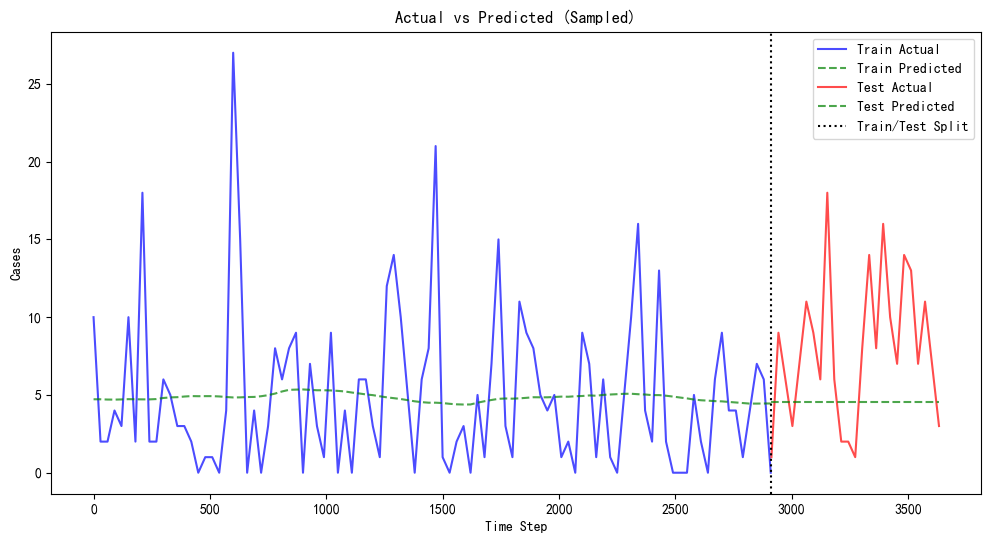

In [137]:
import matplotlib.pyplot as plt

# 假设 y_train, y_train_pred, y_test, y_test_pred 已经定义为 numpy 数组
sampling_rate = 30  # 每 30 个点采样 1 个

plt.figure(figsize=(12, 6))

# 创建 X 轴时间步（降采样）
train_steps = range(len(y_train_actual))
test_steps = range(len(y_train_actual), len(y_train_actual) + len(y_test_actual))
y_train_true, y_train_preds
# 采样
train_steps_sampled = train_steps[::sampling_rate]
y_train_actual_sampled = y_train_true[::sampling_rate]
y_train_pred_sampled = y_train_preds[::sampling_rate]

test_steps_sampled = test_steps[::sampling_rate]
y_test_actual_sampled = y_test_actual[::sampling_rate]
y_test_pred_sampled = y_test_pred[::sampling_rate]

# 训练集
plt.plot(train_steps_sampled, y_train_actual_sampled, label="Train Actual", alpha=0.7, color="blue")
plt.plot(train_steps_sampled, y_train_pred_sampled, label="Train Predicted", linestyle="dashed", alpha=0.7, color="green")

# 测试集
plt.plot(test_steps_sampled, y_test_actual_sampled, label="Test Actual", alpha=0.7, color="red")
plt.plot(test_steps_sampled, y_test_pred_sampled, label="Test Predicted", linestyle="dashed", alpha=0.7, color="green")

# 添加分界线
plt.axvline(x=len(y_train_actual), color="black", linestyle="dotted", label="Train/Test Split")

# 轴标签 & 标题
plt.xlabel("Time Step")
plt.ylabel("Cases")
plt.title("Actual vs Predicted (Sampled)")
plt.legend()
plt.show()
